In [1]:
import pickle
from helper_fxns import convert_param_vec_dict_to_param_dict, gelman_rubin_trace_dict, print_convergence_summary, sample_plots, create_trace_matrix, plot_histograms
from earm.lopez_embedded import model
%matplotlib inline
import os
import numpy as np
from corner import corner
import matplotlib.pyplot as plt
import seaborn as sns

/Users/Erin/Library/Python/2.7/lib/python/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/Users/Erin/Library/Python/2.7/lib/python/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [2]:
len(model.parameters_rules())

105

In [3]:
os.chdir('/Users/Erin/git/accre_data_analysis/normal_priors_sd3_nothin')

In [4]:
traces = {}
for trace in ['a', 'b', 'c', 'd']:
    traces[trace] = [np.load('earm_dreamz_3chain_normal_'+str(trace)+'_sampled_params_chain_0.npy')]
    for chain in range(1, 3):
        traces[trace].append(np.load('earm_dreamz_3chain_normal_'+str(trace)+'_sampled_params_chain_'+str(chain)+'.npy'))

In [5]:
logps = {}
for trace in ['a', 'b', 'c', 'd']:
    logps[trace] = [np.load('earm_dreamz_3chain_normal_'+str(trace)+'_logps_chain_0.npy')]
    print 'Logp of trace: ',trace,' chain: 0 = ',logps[trace][-1]
    for chain in range(1, 3):
        logps[trace].append(np.load('earm_dreamz_3chain_normal_'+str(trace)+'_logps_chain_'+str(chain)+'.npy'))
        print 'Logp of trace: ',trace,' chain: ',chain,' = ',logps[trace][-1][-1]

Logp of trace:  a  chain: 0 =  [[-2459.49746709]
 [-2459.49746709]
 [-2459.49746709]
 ..., 
 [  155.32976863]
 [  155.32976863]
 [  155.32976863]]
Logp of trace:  a  chain:  1  =  [ 159.21869795]
Logp of trace:  a  chain:  2  =  [ 163.78484982]
Logp of trace:  b  chain: 0 =  [[-2966.91386493]
 [-2192.54228224]
 [-2173.58275251]
 ..., 
 [  159.27939817]
 [  159.27939817]
 [  159.27939817]]
Logp of trace:  b  chain:  1  =  [ 151.4578492]
Logp of trace:  b  chain:  2  =  [ 153.21352247]
Logp of trace:  c  chain: 0 =  [[-1768.50560417]
 [-1768.50560417]
 [-1768.50560417]
 ..., 
 [  151.24519341]
 [  151.24519341]
 [  151.24519341]]
Logp of trace:  c  chain:  1  =  [ 156.36722249]
Logp of trace:  c  chain:  2  =  [ 148.82449402]
Logp of trace:  d  chain: 0 =  [[-2204.14541513]
 [-2204.14541513]
 [-2204.14541513]
 ..., 
 [  158.63086254]
 [  158.63086254]
 [  158.63086254]]
Logp of trace:  d  chain:  1  =  [ 155.57798188]
Logp of trace:  d  chain:  2  =  [ 158.09899358]


In [6]:
traces['b'][0][:,72]

array([-1.22139691,  0.50705821,  0.50705821, ...,  2.02793644,
        2.02793644,  2.02793644])

In [7]:
traces['a'][0][:,72]

array([-1.28746417, -1.28746417, -1.28746417, ..., -4.0936049 ,
       -4.0936049 , -4.0936049 ])

In [8]:
param_trace_dicts = {}
param_trace_dict_a = {}
gelman_rubin_dicts = {}
param_trace_dict_a['param_list'] = [param.name for param in model.parameters_rules()]
for run in ['a', 'b', 'c', 'd']:
    for i, param in enumerate(model.parameters_rules()):
        param_trace_dict_a[param.name] = [traces[run][chain][:,i] for chain in range(len(traces[run]))]
    param_trace_dicts[run] = param_trace_dict_a
    gelman_rubin_dicts[run] = gelman_rubin_trace_dict(param_trace_dict_a)
    param_trace_dict_a = {}
    param_trace_dict_a['param_list'] = [param.name for param in model.parameters_rules()]

In [9]:
print_convergence_summary(param_trace_dicts['a'])

Number of parameters with GR below 1.2:  85  of  105  parameters.
Percent of parameters with GR below 1.2:  80.9523809524
Number of parameters with GR below 1.1:  62  of  105  parameters.
Percent of parameters with GR below 1.1:  59.0476190476


[85, 80.95238095238095, 62, 59.04761904761905]

In [10]:
print_convergence_summary(param_trace_dicts['b'])

Number of parameters with GR below 1.2:  96  of  105  parameters.
Percent of parameters with GR below 1.2:  91.4285714286
Number of parameters with GR below 1.1:  80  of  105  parameters.
Percent of parameters with GR below 1.1:  76.1904761905


[96, 91.42857142857143, 80, 76.19047619047619]

In [11]:
print_convergence_summary(param_trace_dicts['c'])

Number of parameters with GR below 1.2:  97  of  105  parameters.
Percent of parameters with GR below 1.2:  92.380952381
Number of parameters with GR below 1.1:  70  of  105  parameters.
Percent of parameters with GR below 1.1:  66.6666666667


[97, 92.38095238095238, 70, 66.66666666666666]

In [12]:
print_convergence_summary(param_trace_dicts['d'])

Number of parameters with GR below 1.2:  100  of  105  parameters.
Percent of parameters with GR below 1.2:  95.2380952381
Number of parameters with GR below 1.1:  79  of  105  parameters.
Percent of parameters with GR below 1.1:  75.2380952381


[100, 95.23809523809523, 79, 75.23809523809524]

In [13]:
param_trace_dicts['d']['bind_L_R_to_LR_kf']

[array([-6.20290564, -6.20290564, -6.20290564, ..., -5.78307608,
        -5.78307608, -5.78307608]),
 array([-6.25632369, -7.43650876, -7.43650876, ..., -5.9148135 ,
        -5.9148135 , -5.9148135 ]),
 array([-6.2509229 , -6.2509229 , -6.69577834, ..., -4.88849741,
        -4.88849741, -4.88849741])]

50000
3
50000


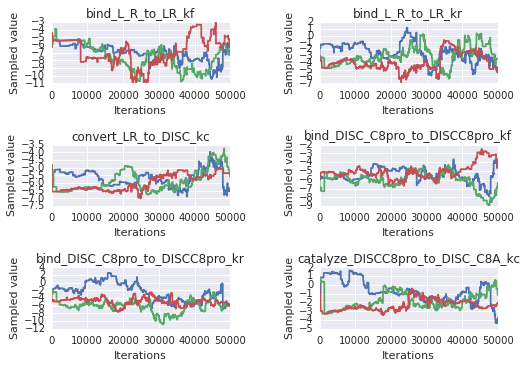

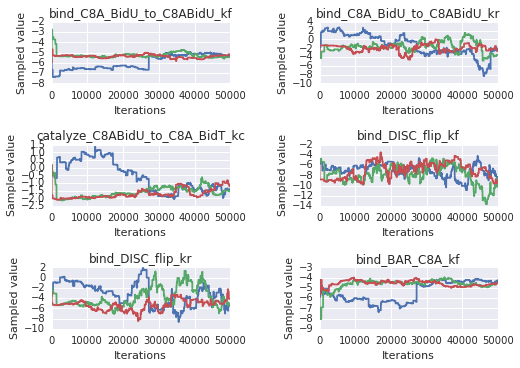

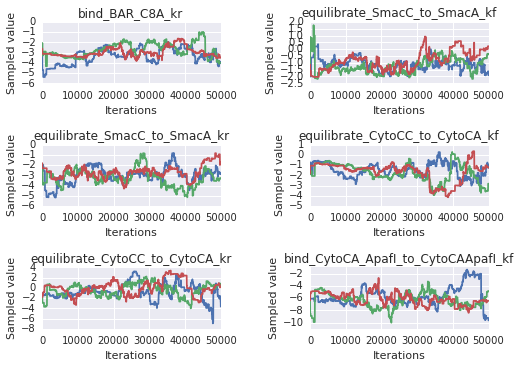

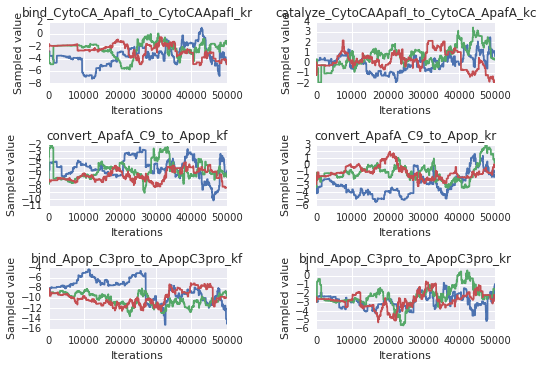

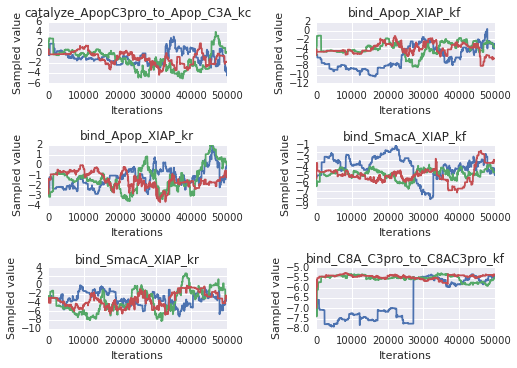

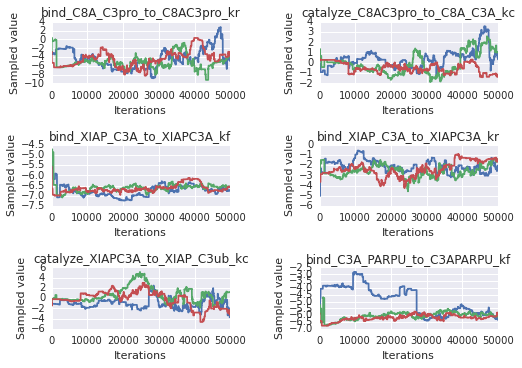

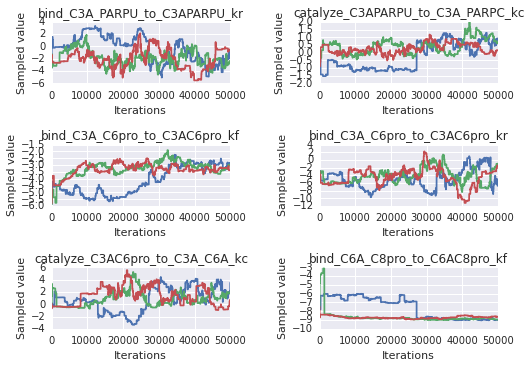

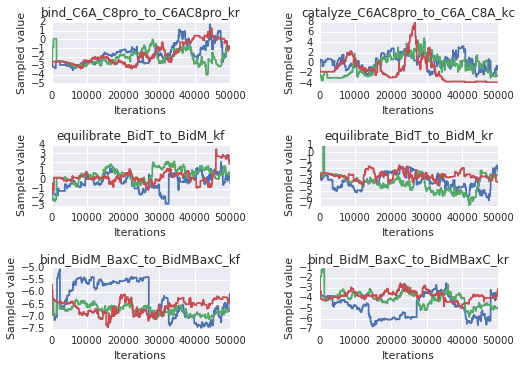

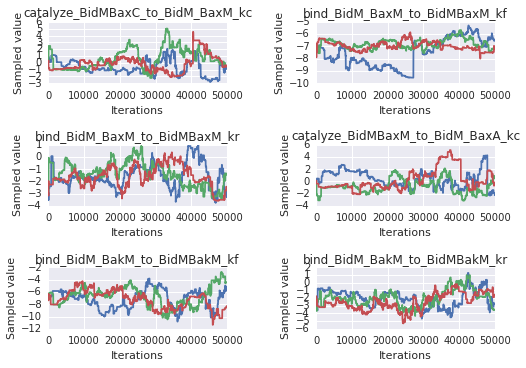

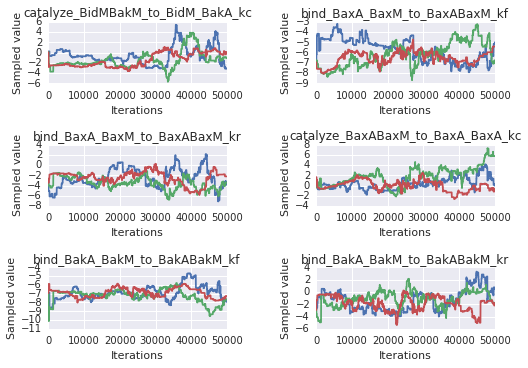

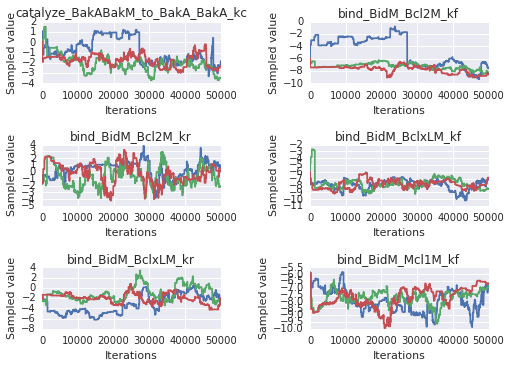

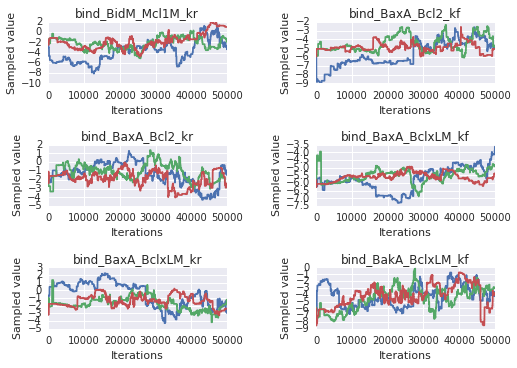

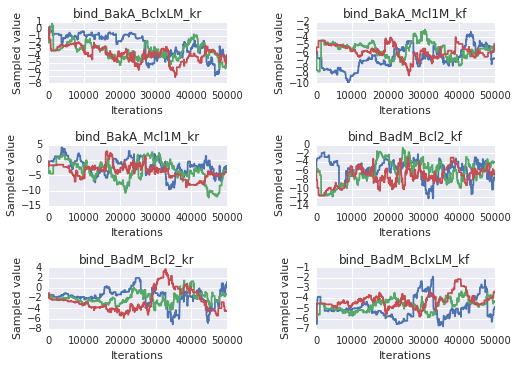

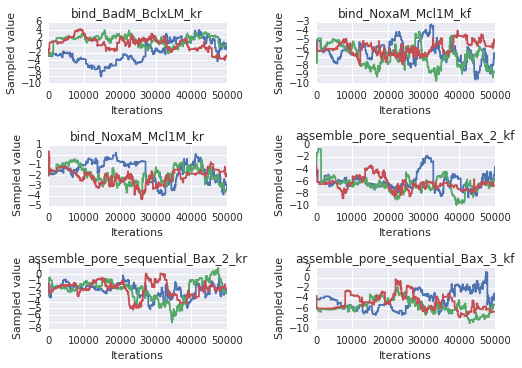

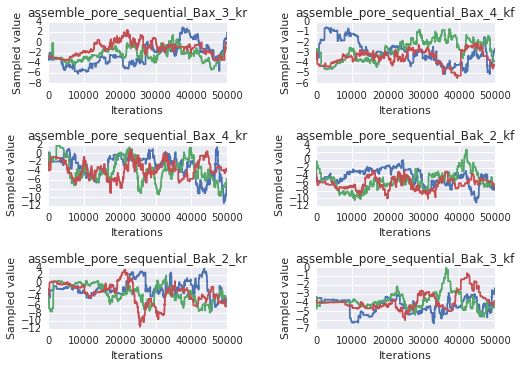

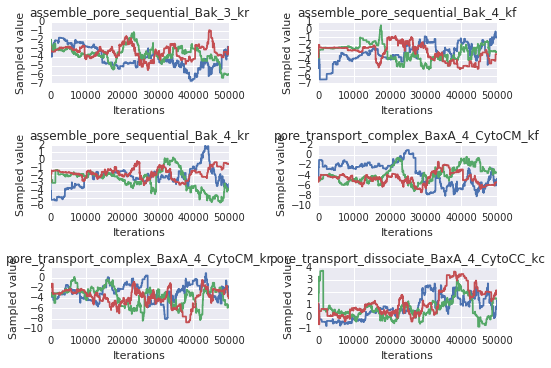

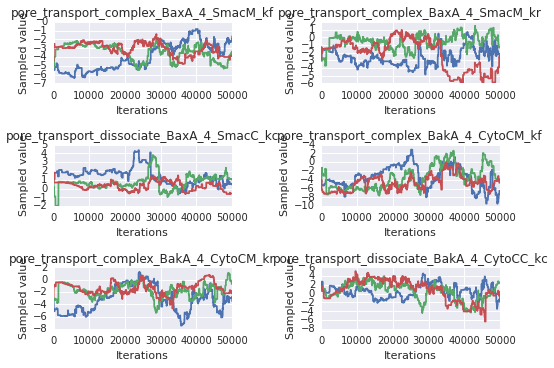

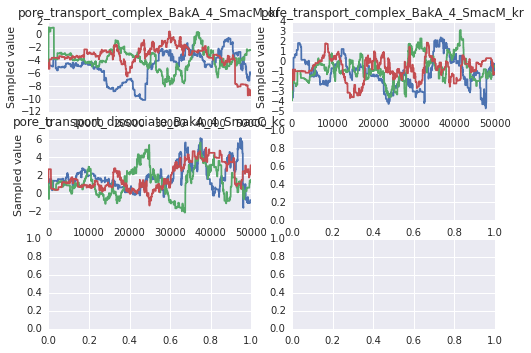

In [14]:
sample_plots(param_trace_dicts['a'])

In [15]:
trace_arr_a = create_trace_matrix(param_trace_dicts['a'], burnin=30000, thin=1)
trace_arr_b = create_trace_matrix(param_trace_dicts['b'], burnin=30000, thin=1)
trace_arr_c = create_trace_matrix(param_trace_dicts['c'], burnin=30000, thin=1)
trace_arr_d = create_trace_matrix(param_trace_dicts['d'], burnin=30000, thin=1)

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/pyplot.py:412: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_num_figures`).
  max_open_warning, RuntimeWarning)


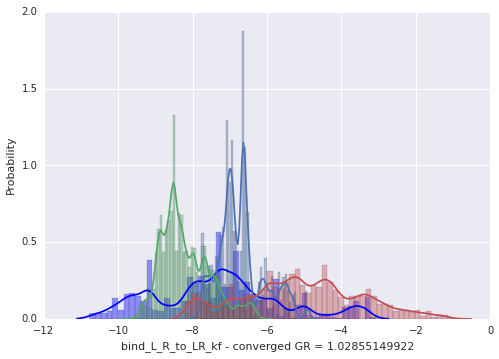

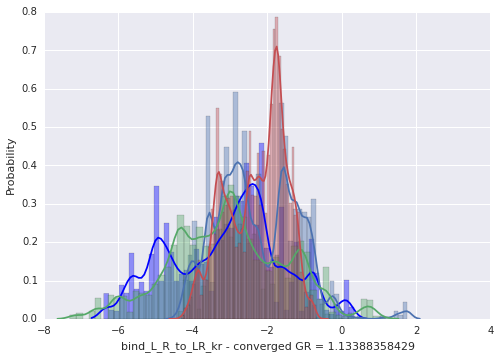

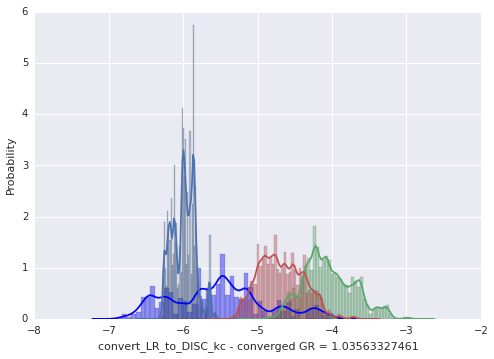

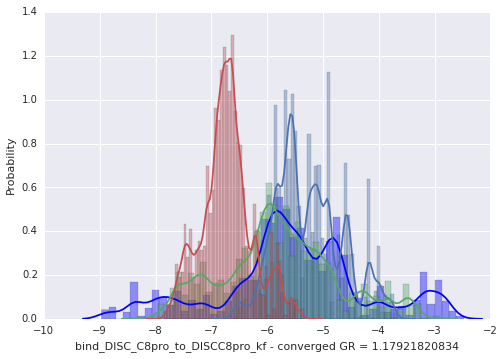

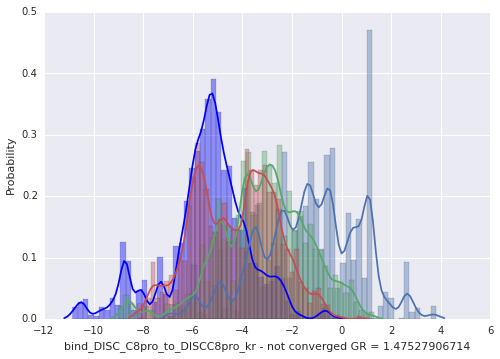

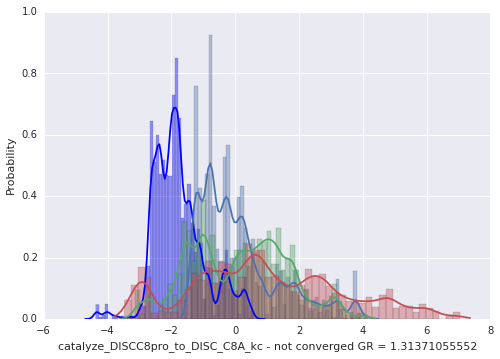

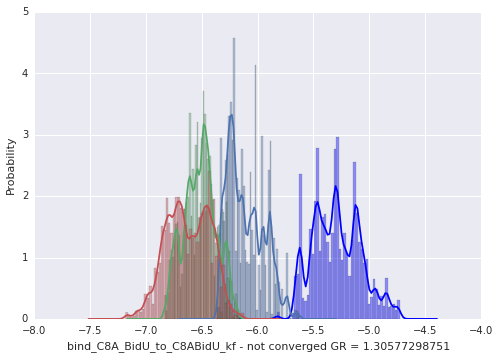

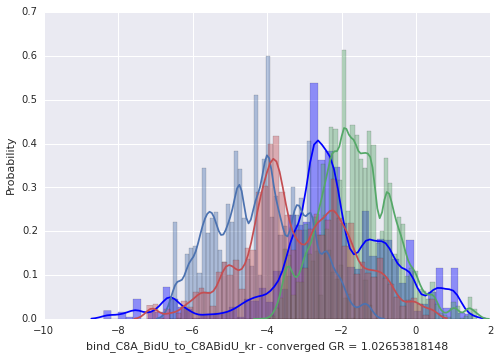

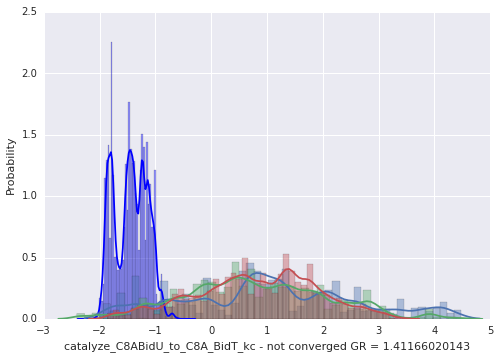

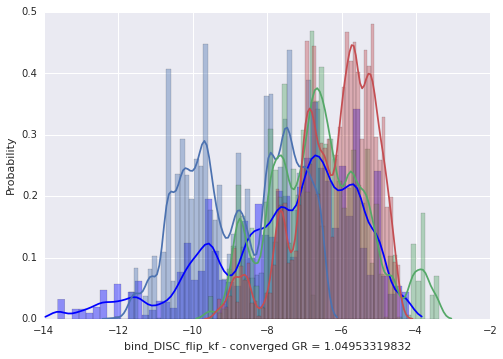

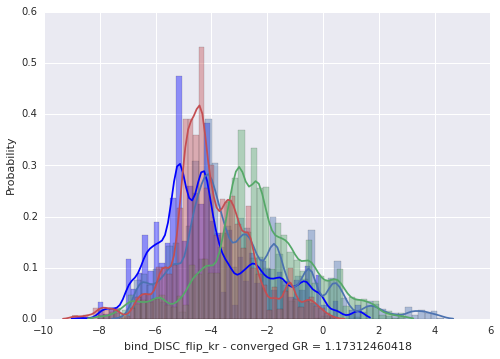

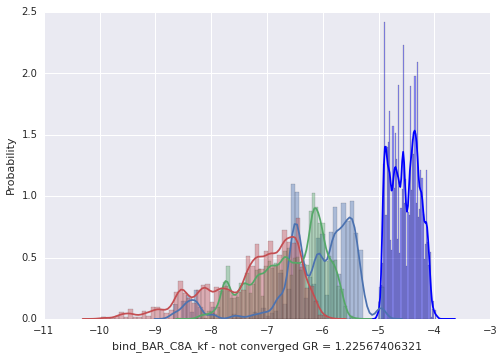

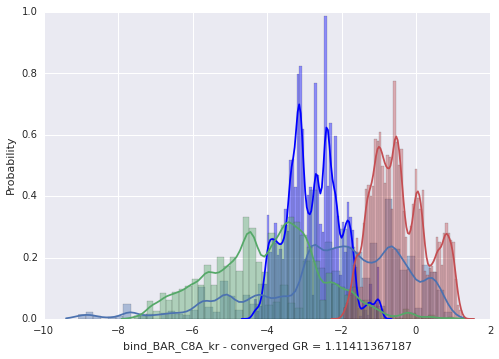

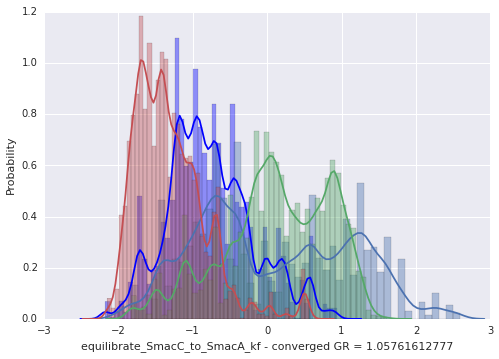

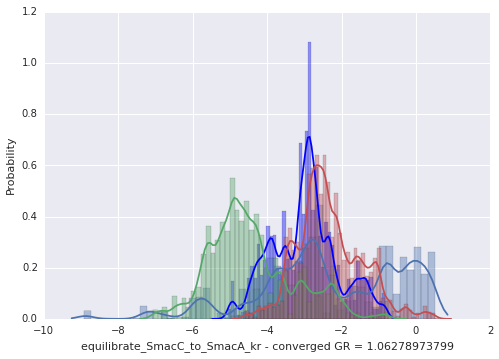

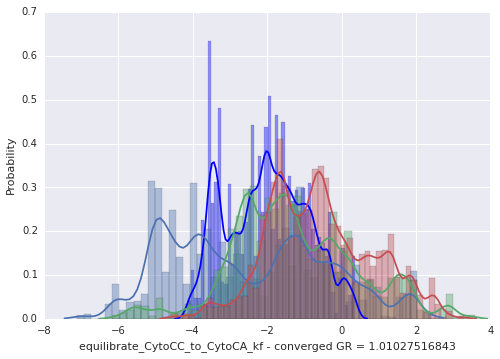

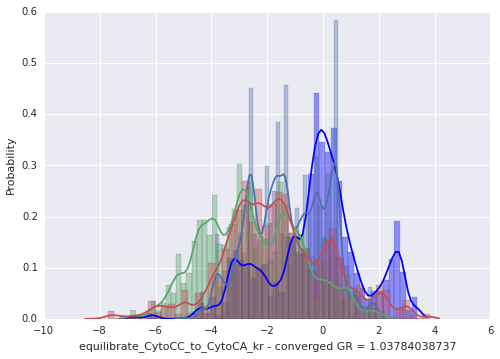

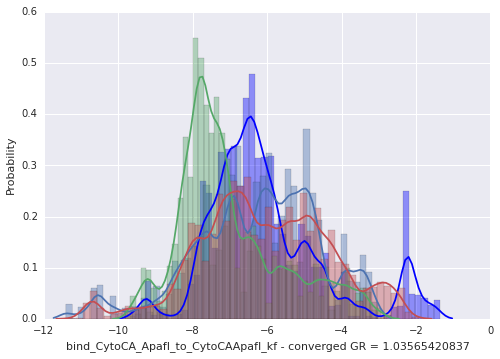

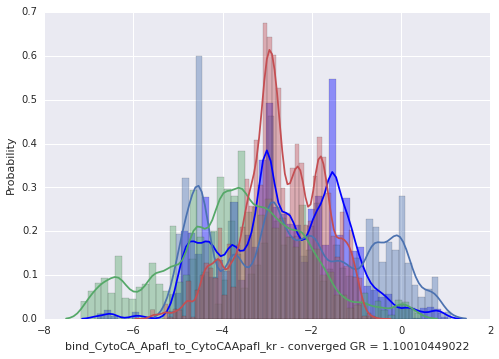

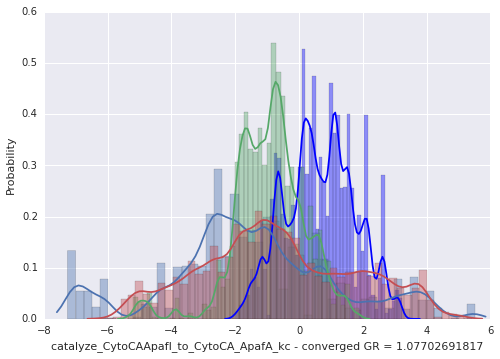

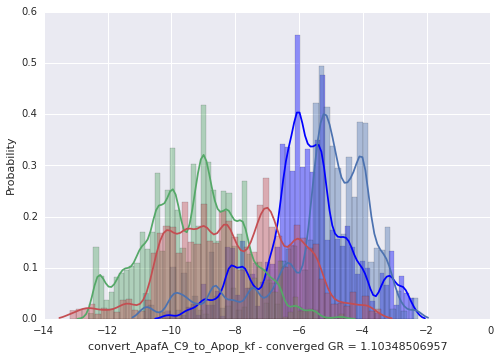

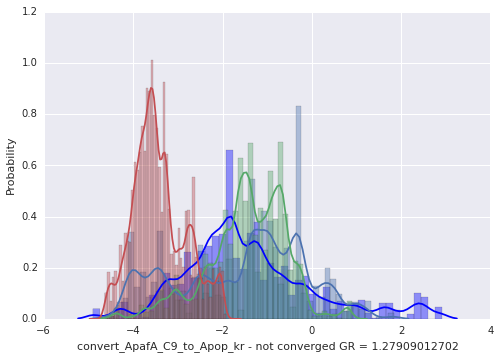

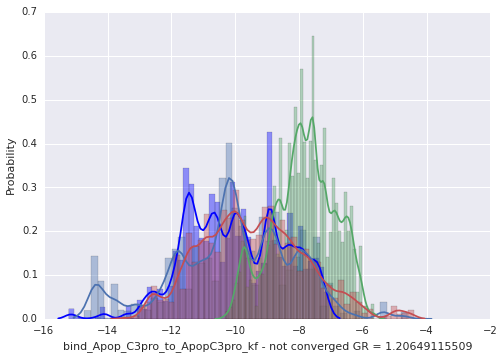

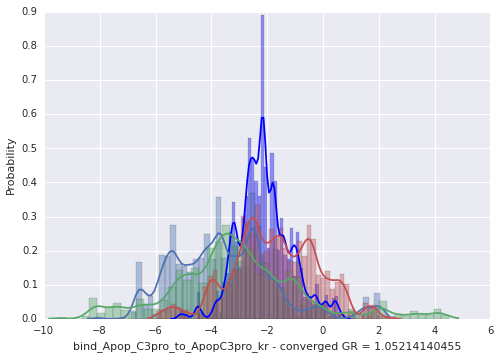

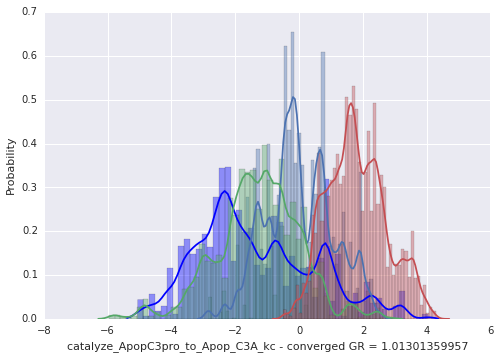

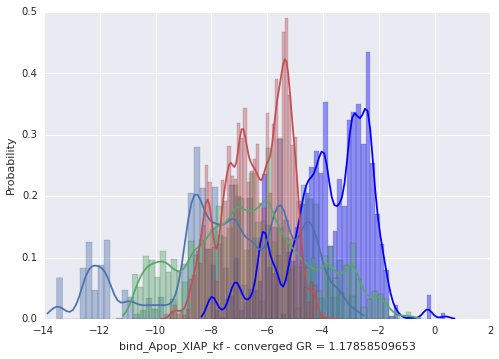

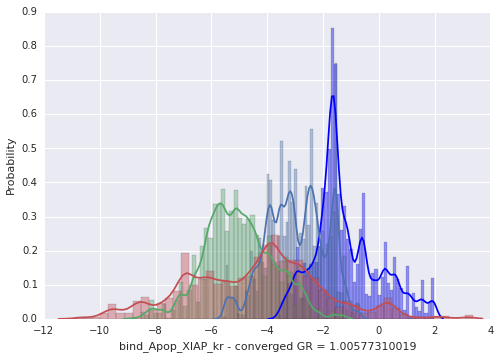

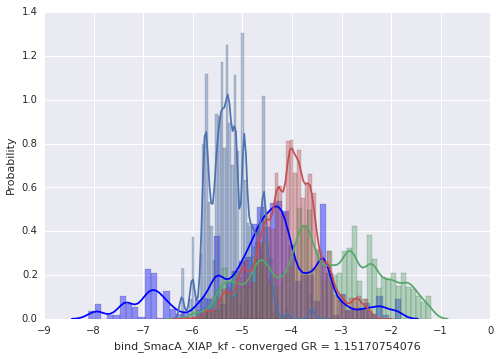

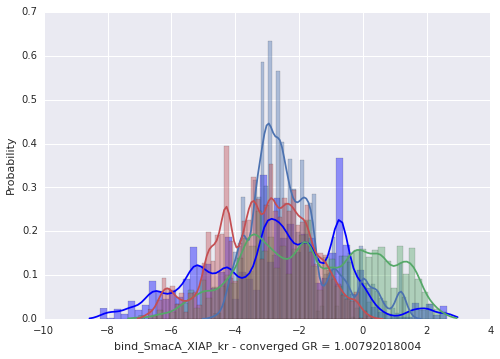

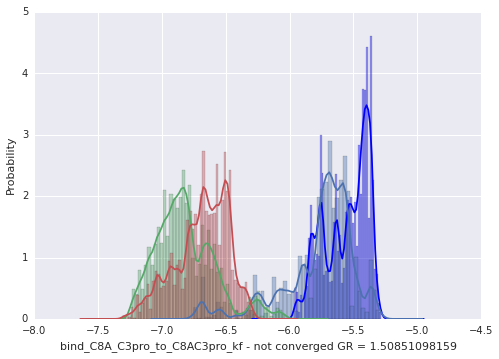

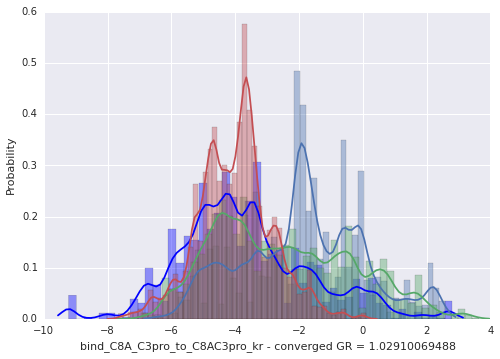

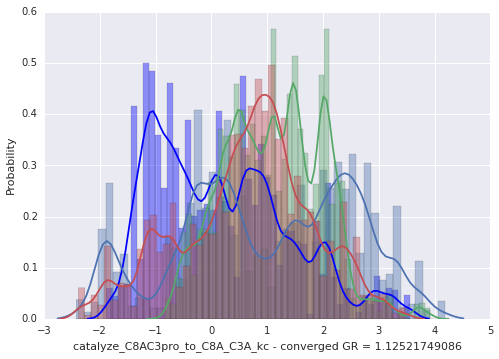

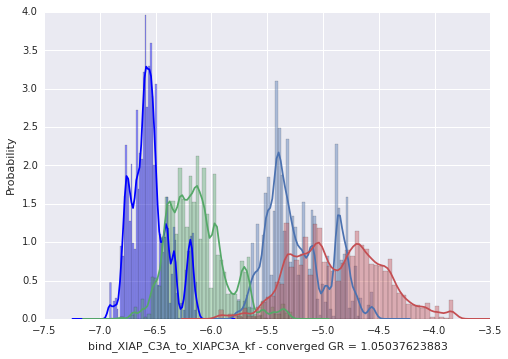

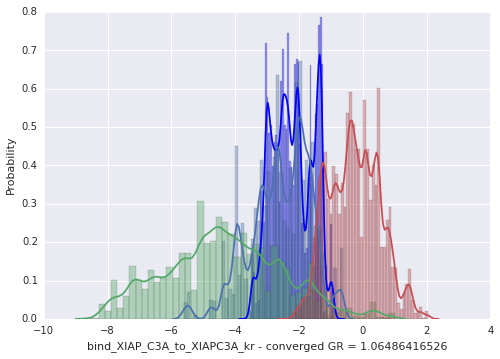

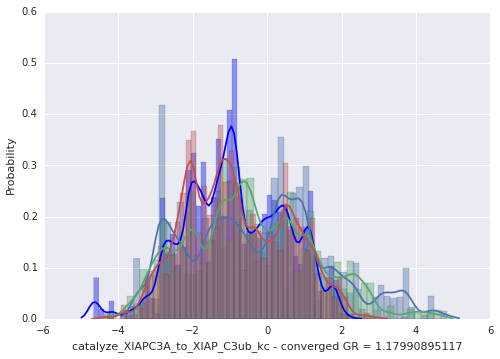

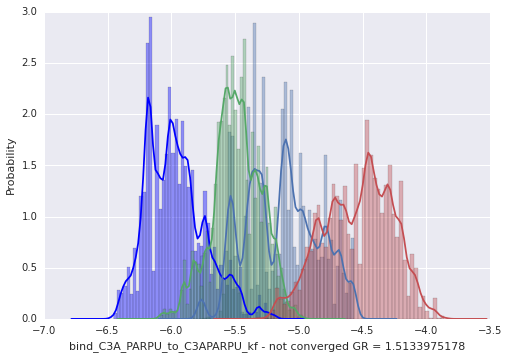

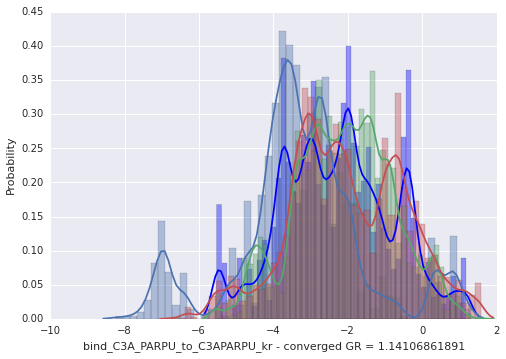

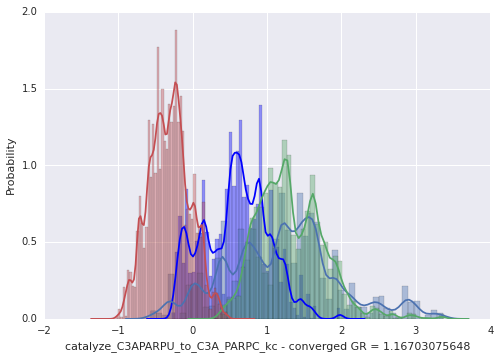

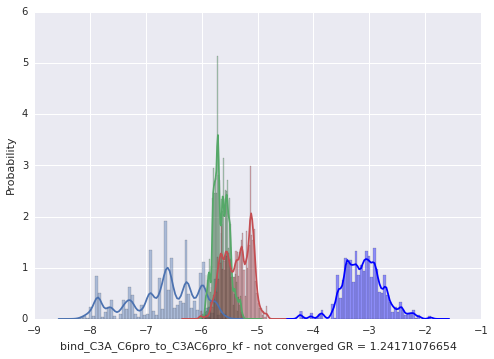

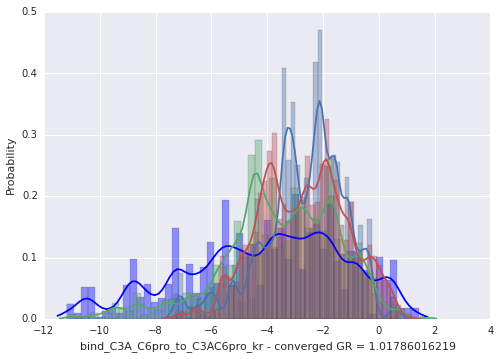

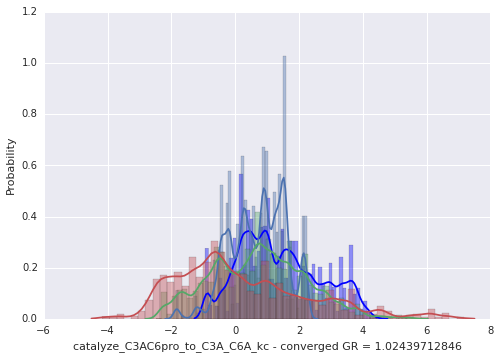

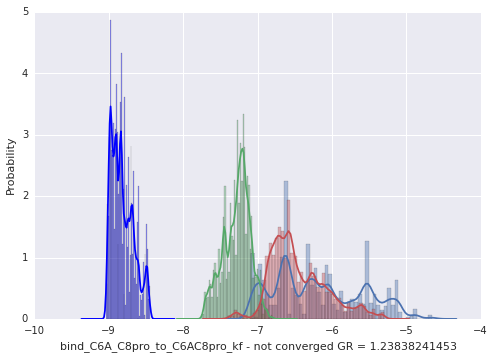

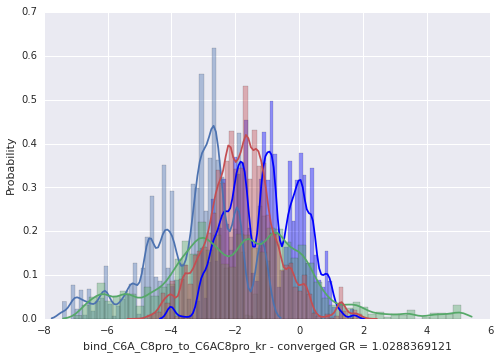

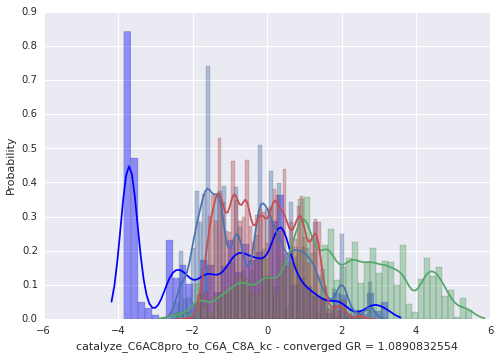

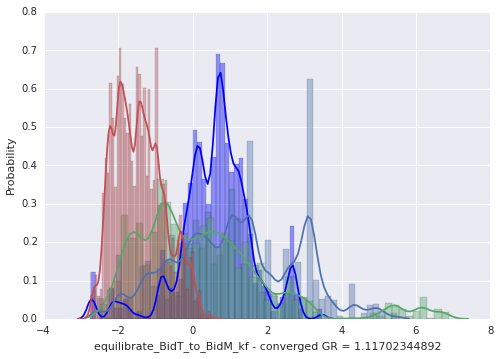

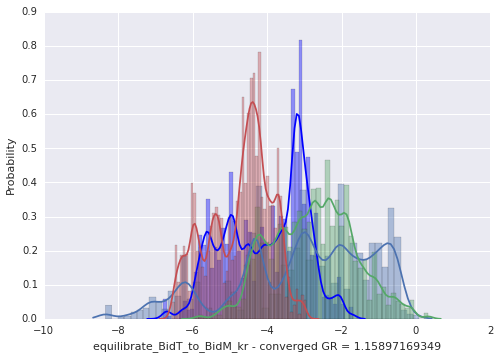

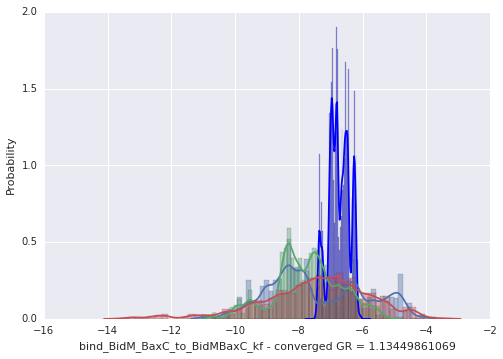

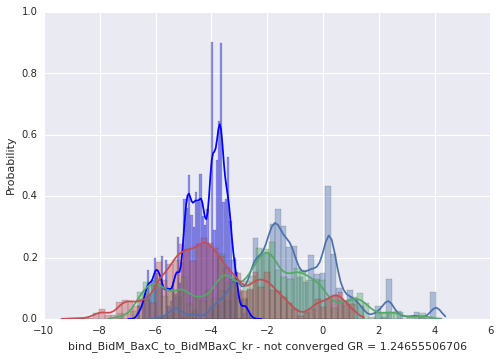

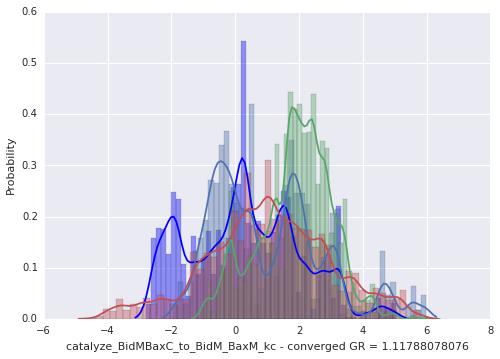

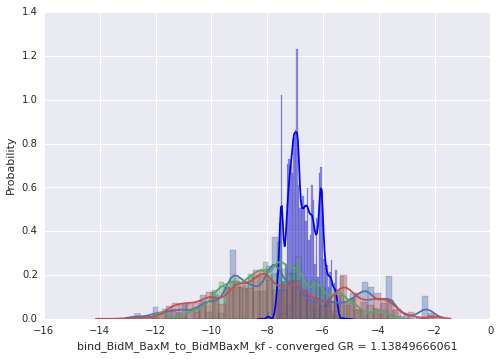

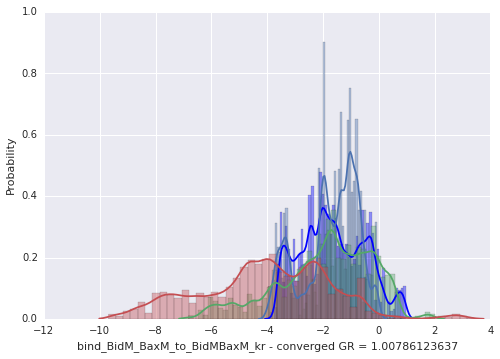

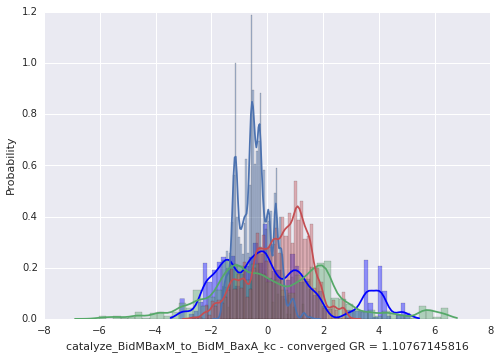

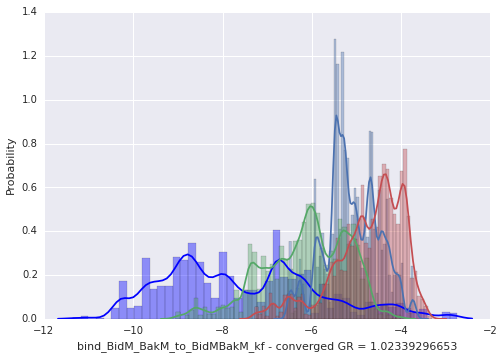

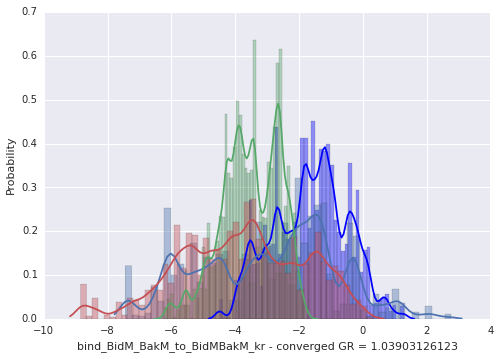

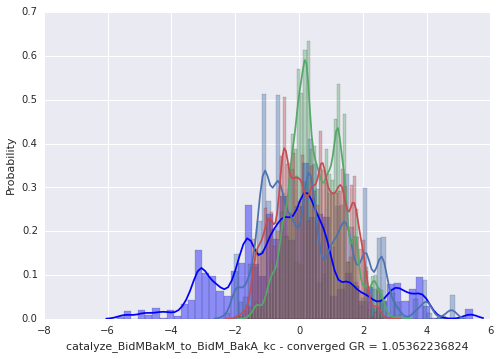

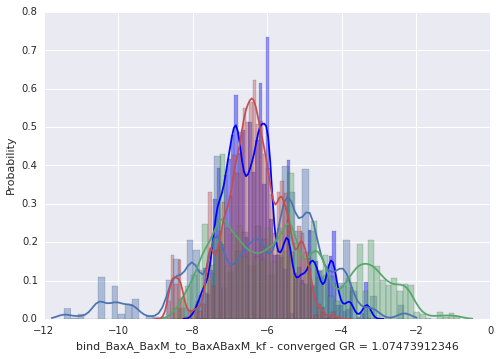

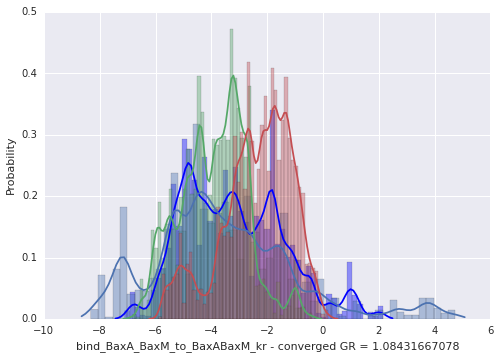

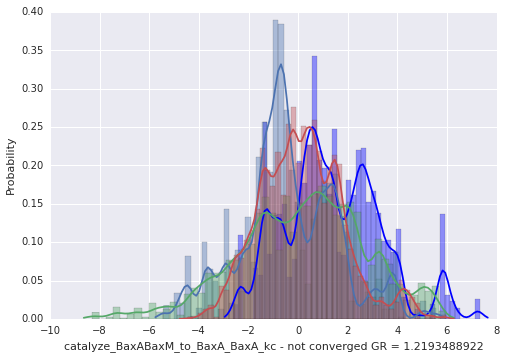

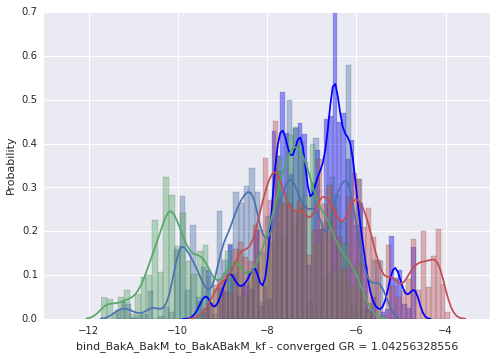

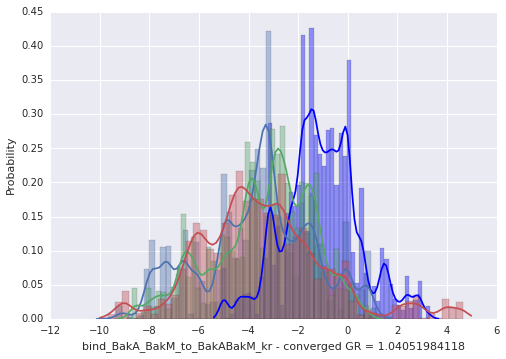

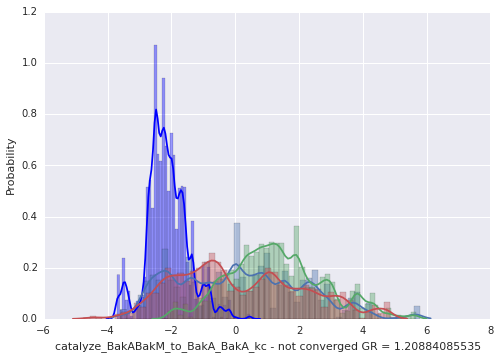

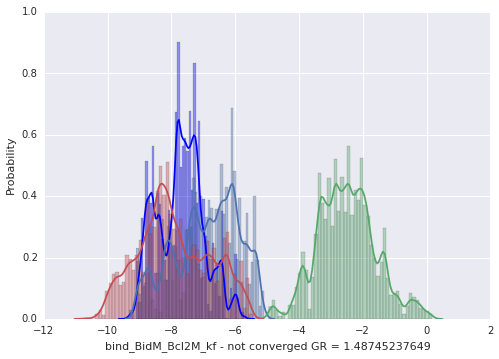

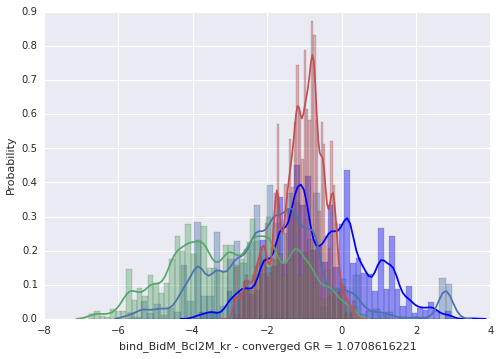

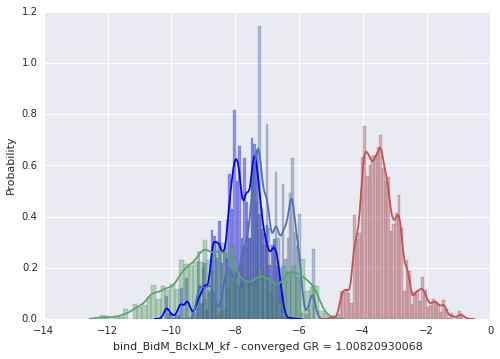

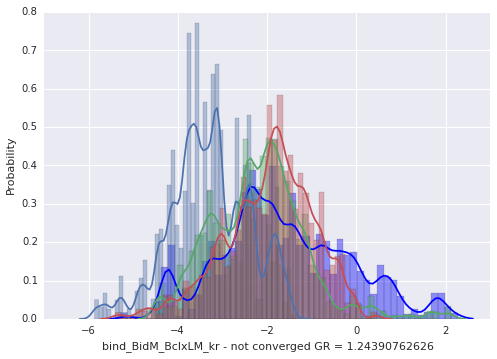

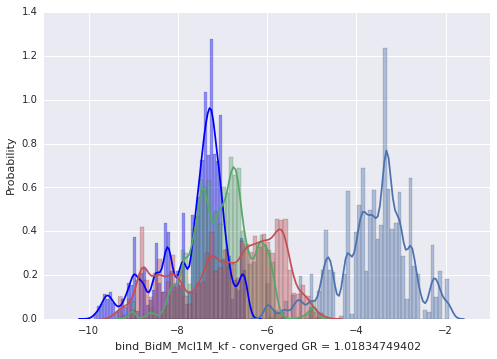

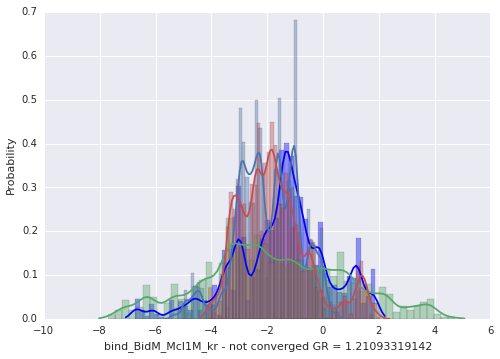

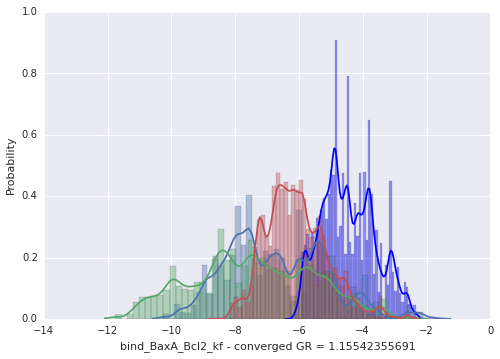

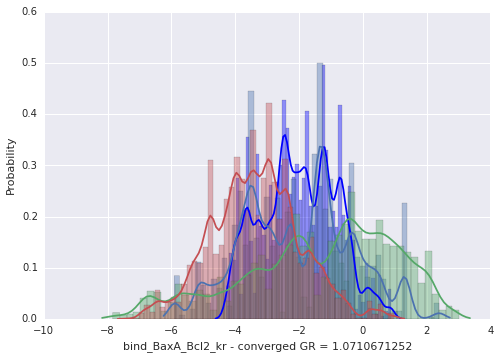

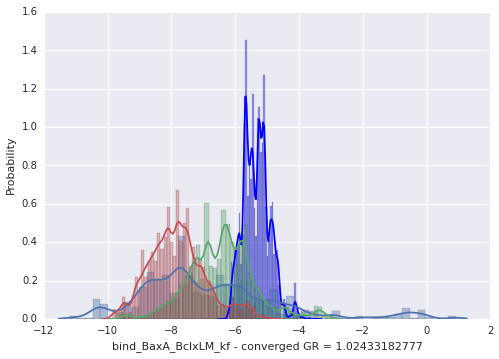

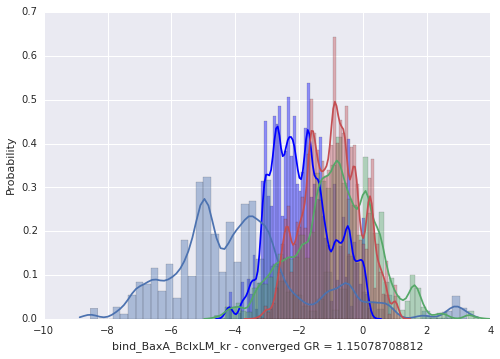

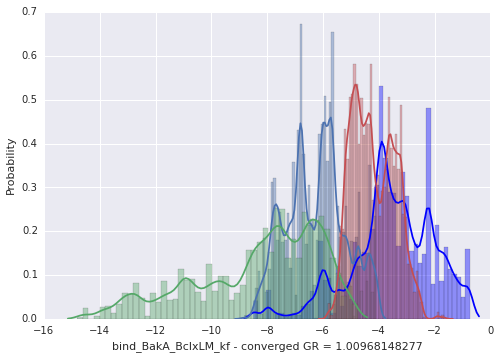

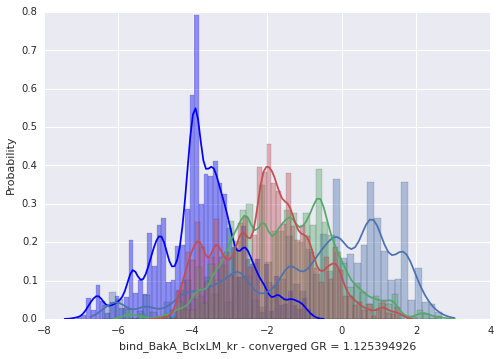

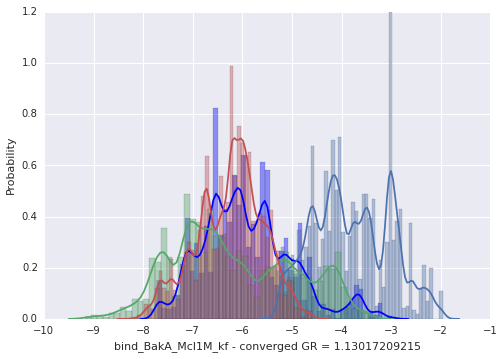

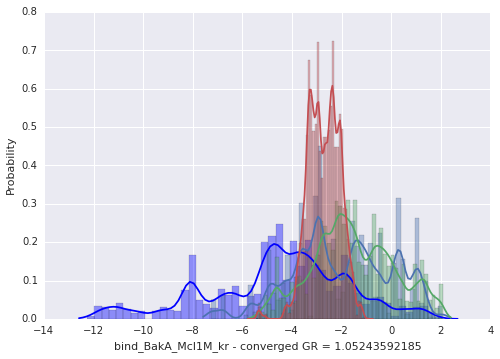

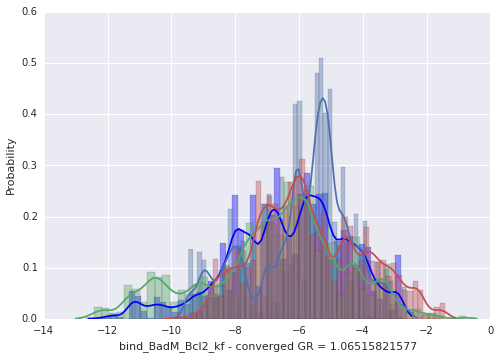

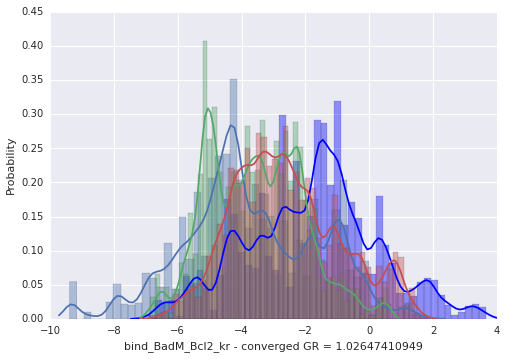

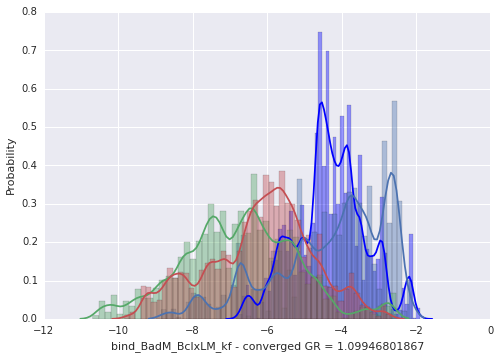

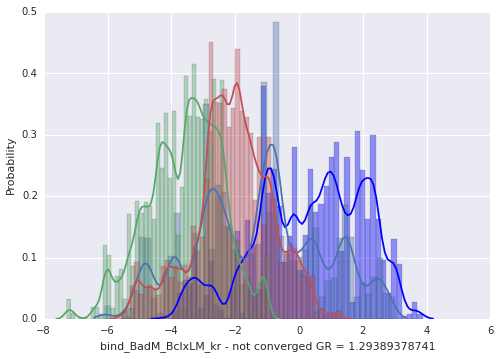

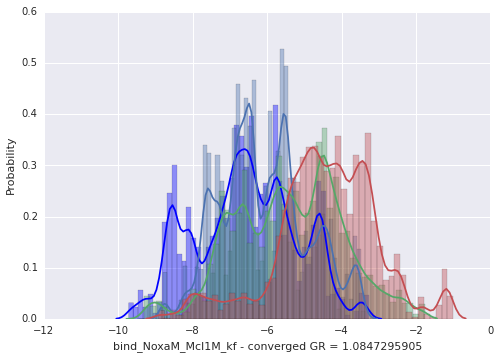

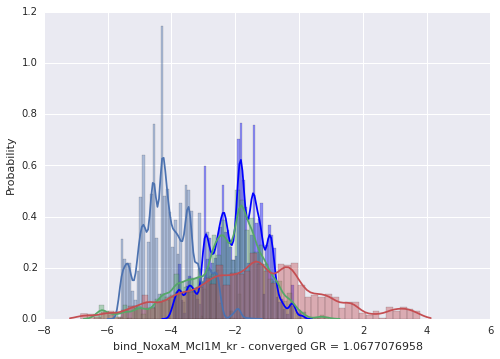

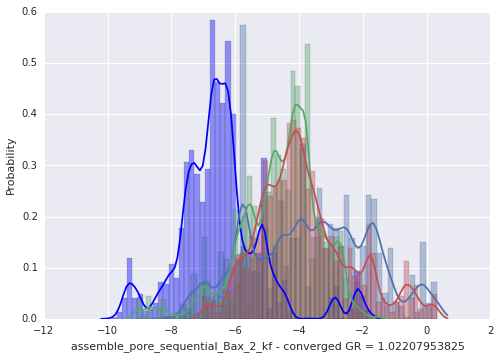

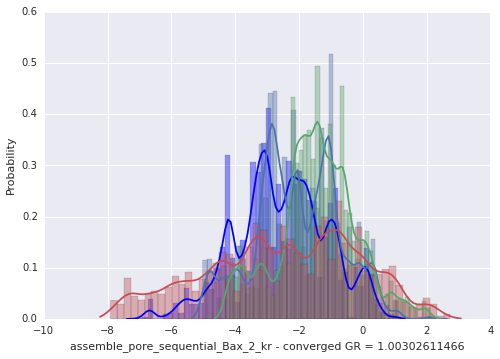

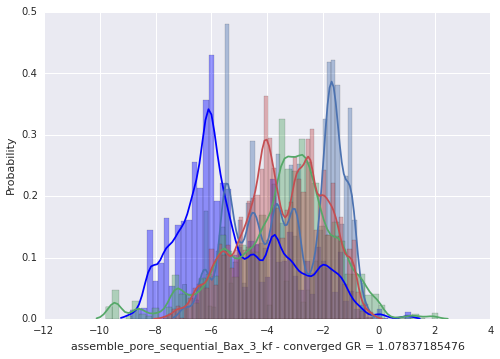

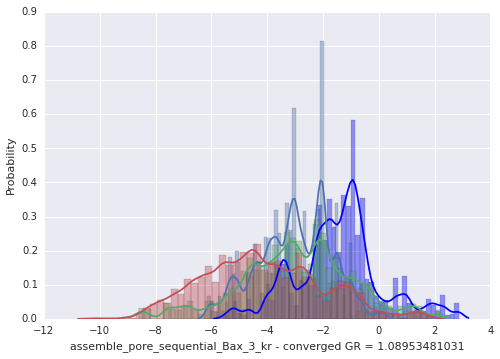

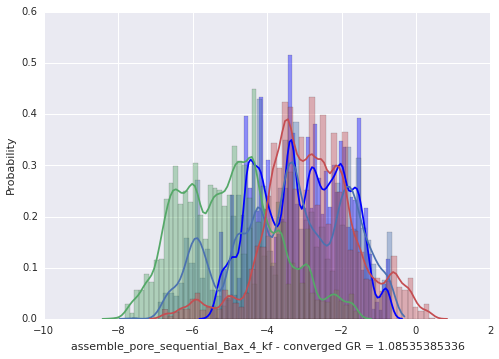

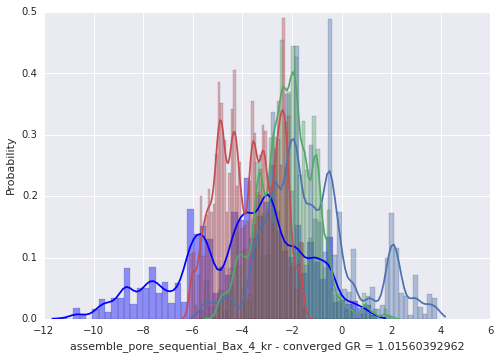

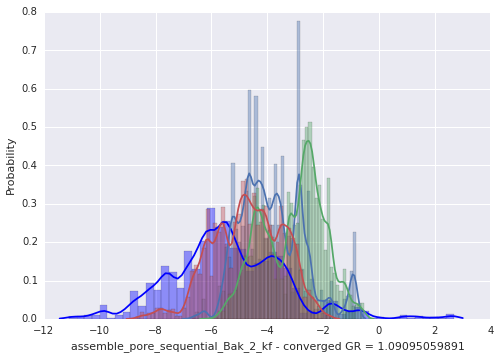

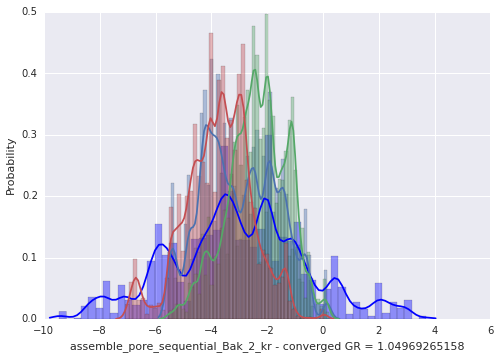

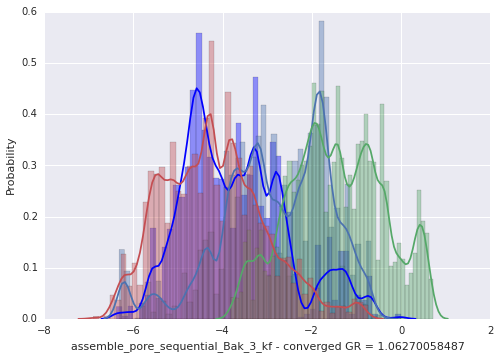

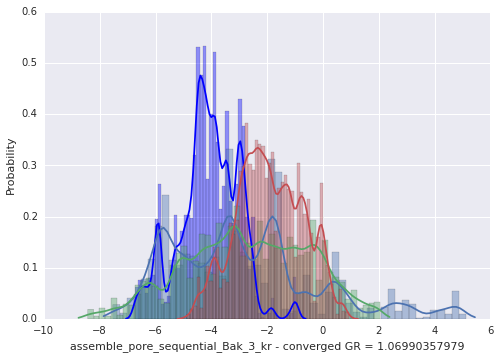

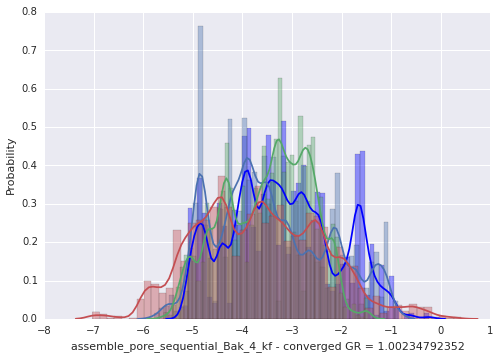

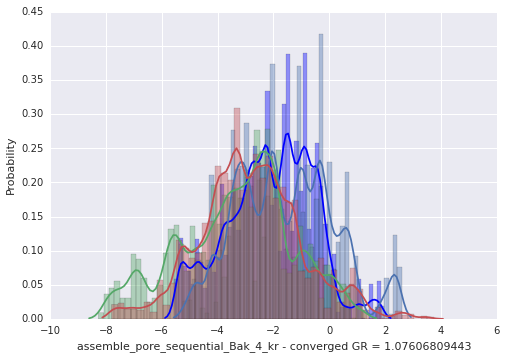

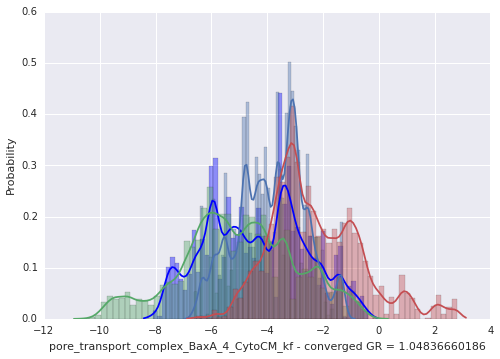

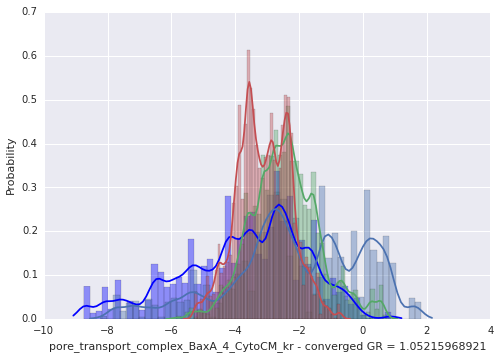

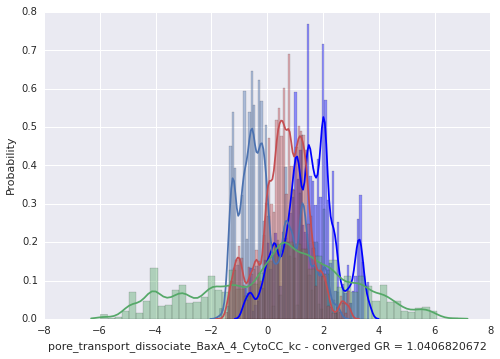

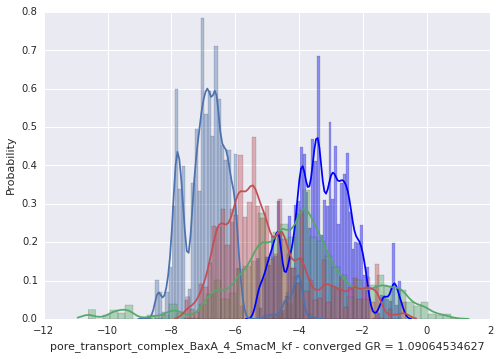

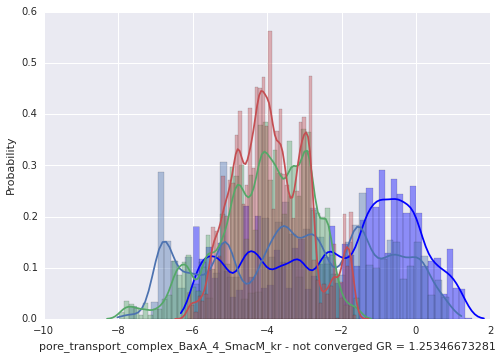

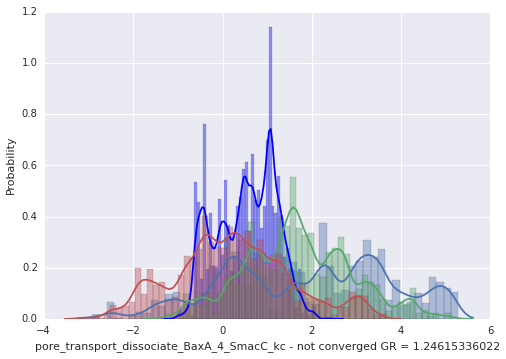

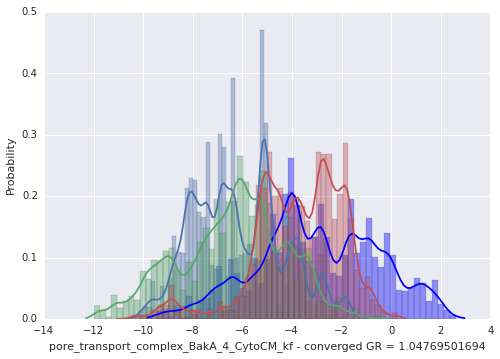

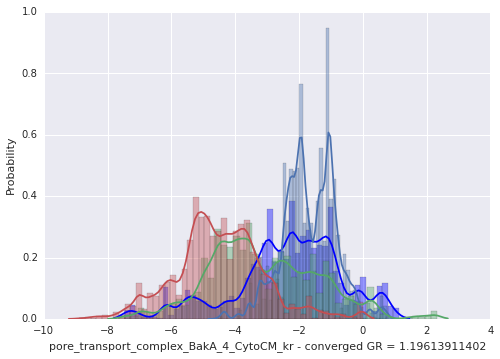

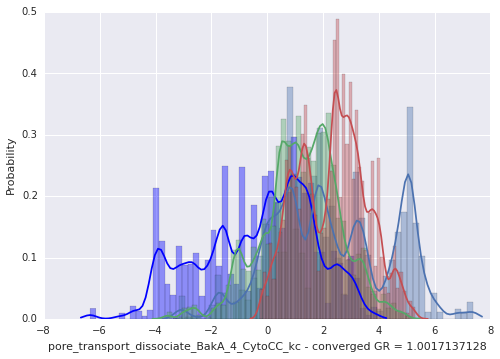

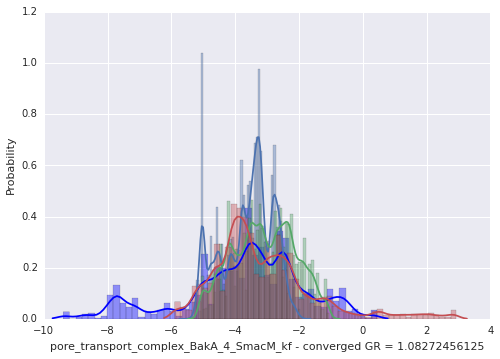

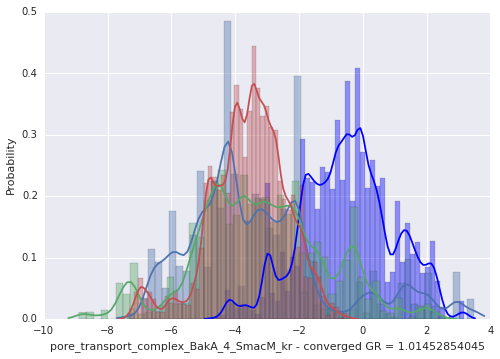

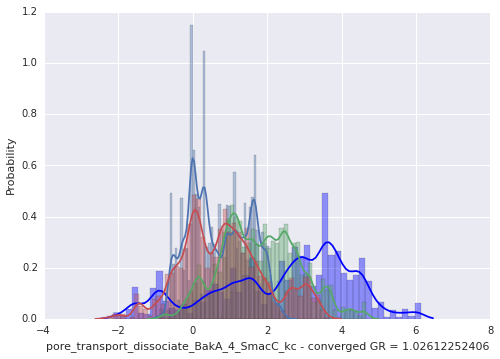

In [16]:
for dim, param_name in enumerate([param.name for param in model.parameters_rules()]):
    fig = plt.figure()
    sns.plotting_context('notebook')
    ax = sns.distplot(trace_arr_a[:,dim], hist=True, color='b')
    sns.distplot(trace_arr_b[:,dim], hist=True)
    sns.distplot(trace_arr_c[:,dim], hist=True)
    sns.distplot(trace_arr_d[:,dim], hist=True)
    if gelman_rubin_dicts['a'][param_name] < 1.2:
        sns.axlabel(param_name+' - converged GR = '+str(gelman_rubin_dicts['a'][param_name]), 'Probability')
    else:
        sns.axlabel(param_name+' - not converged GR = '+str(gelman_rubin_dicts['a'][param_name]), 'Probability')

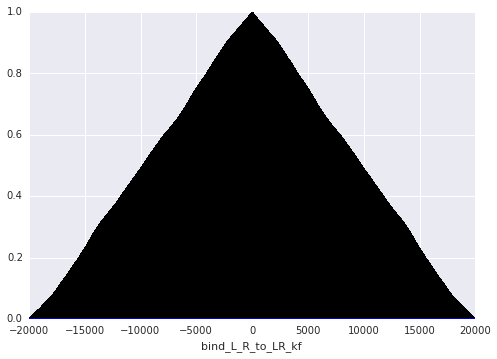

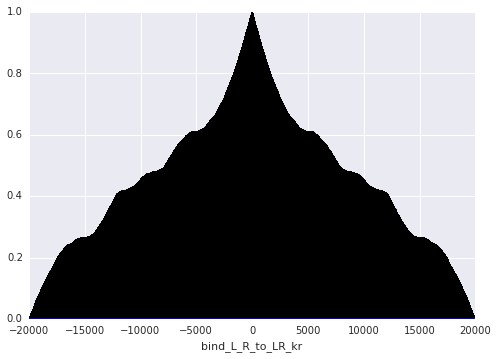

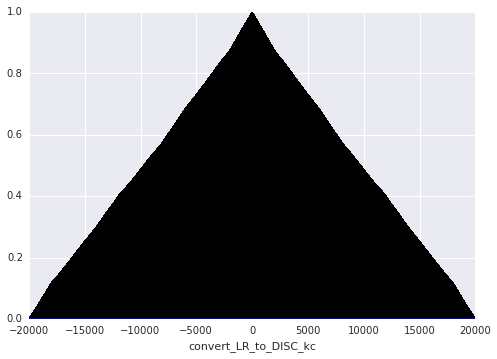

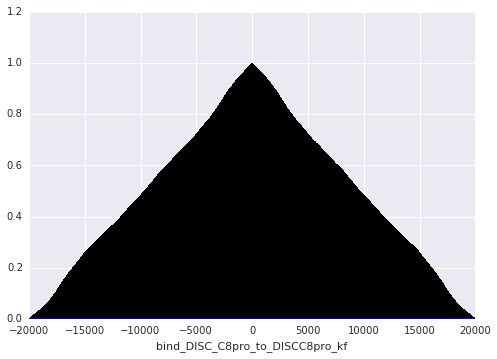

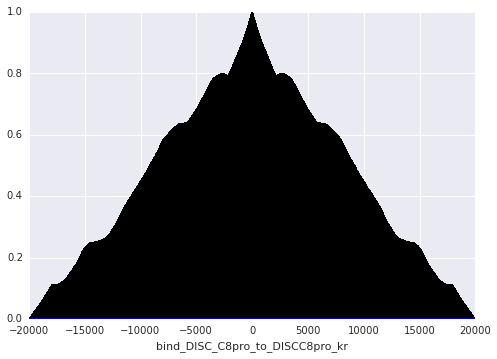

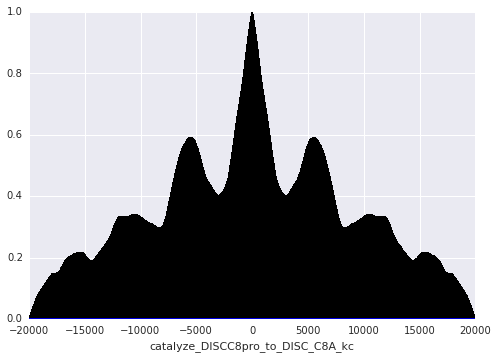

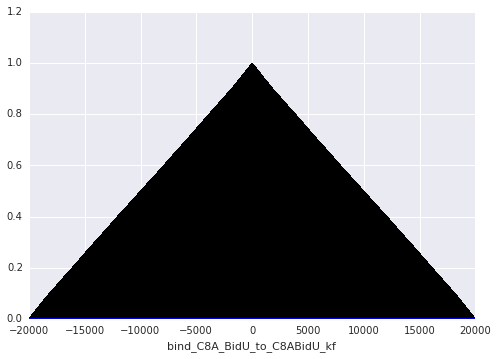

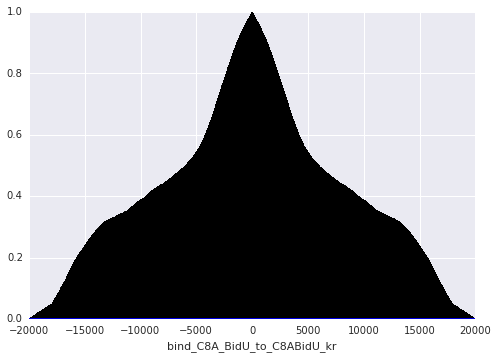

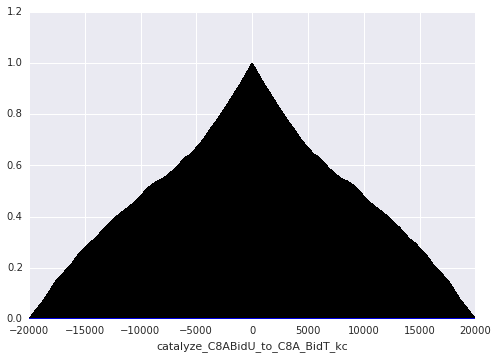

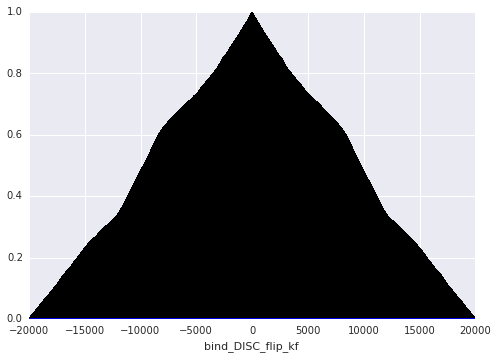

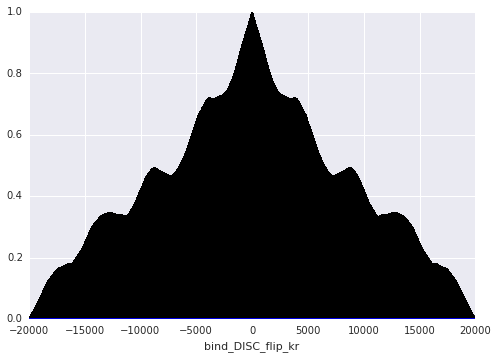

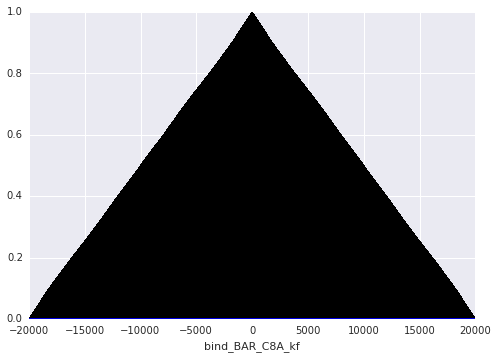

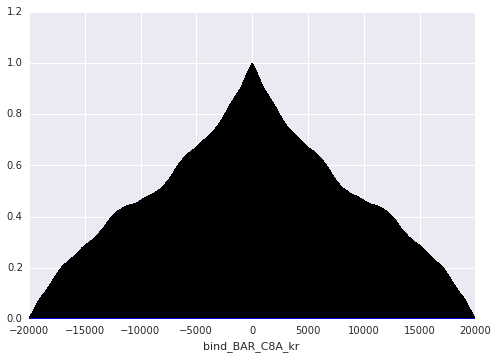

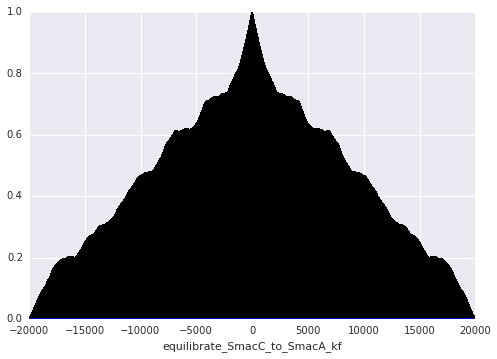

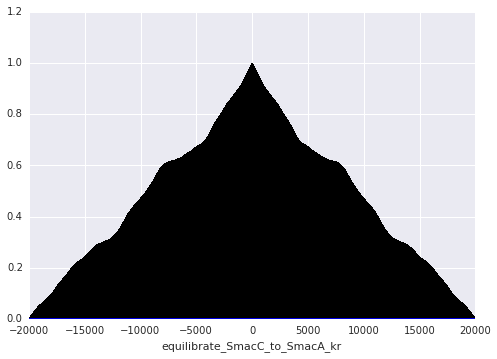

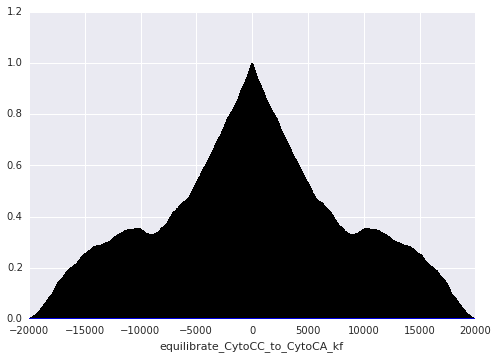

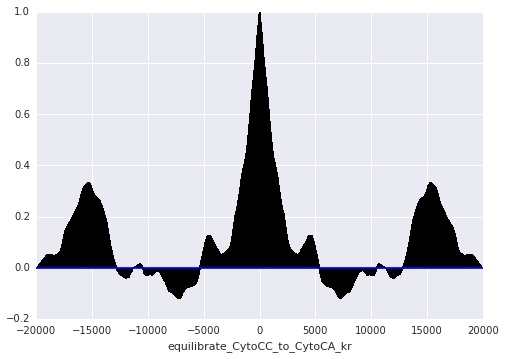

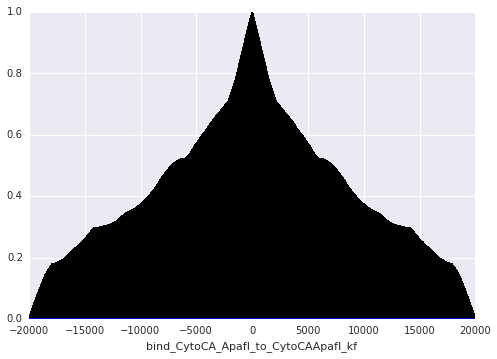

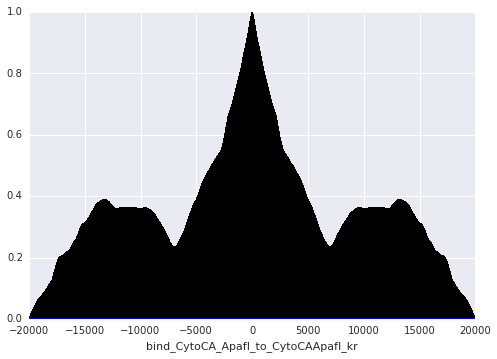

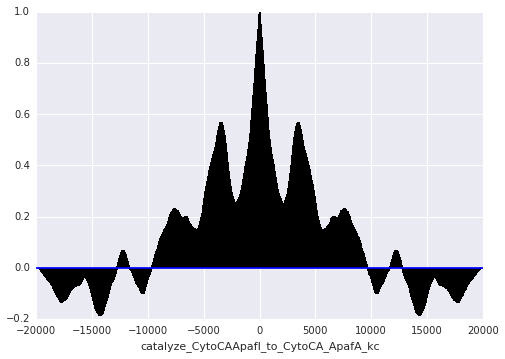

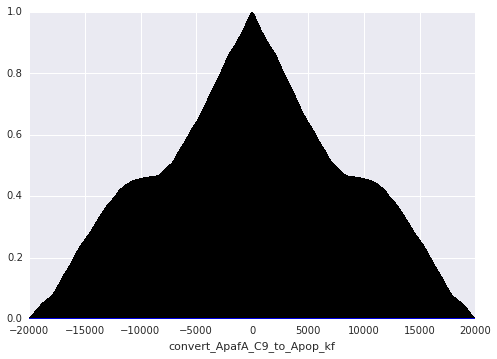

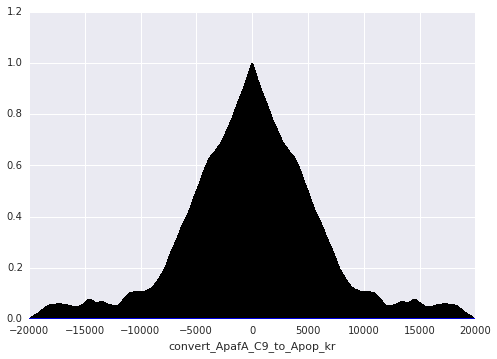

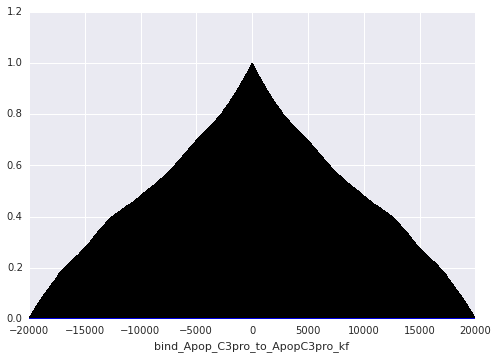

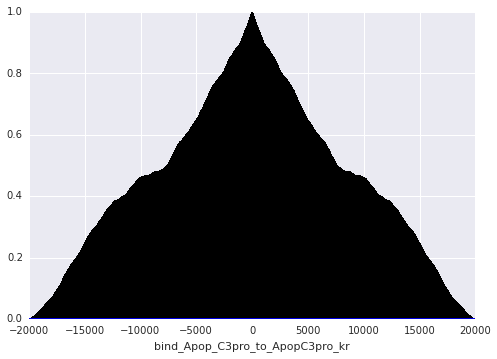

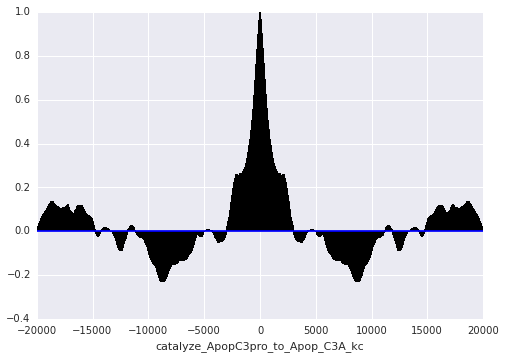

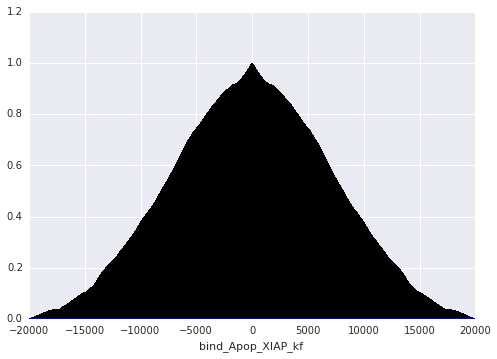

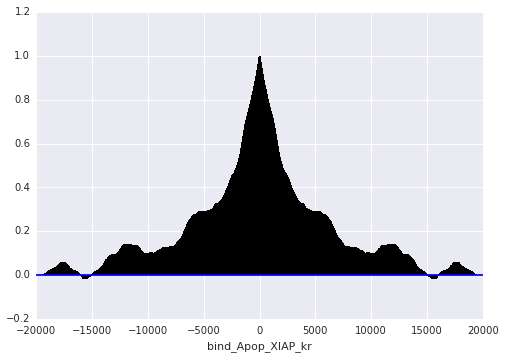

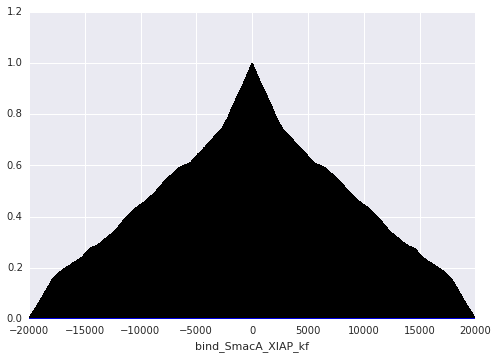

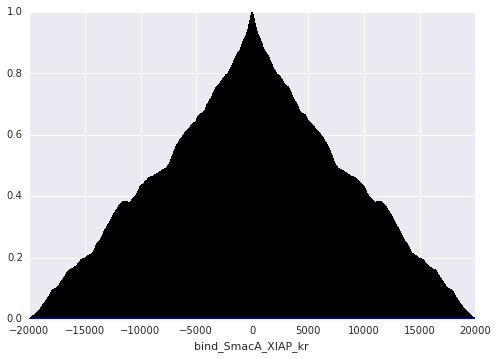

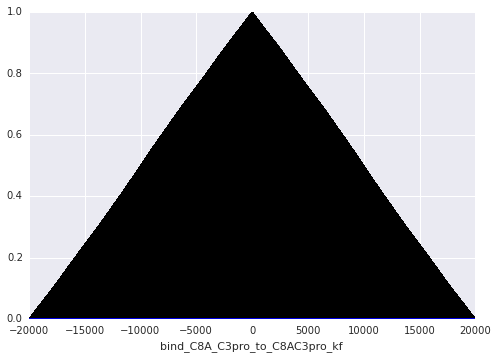

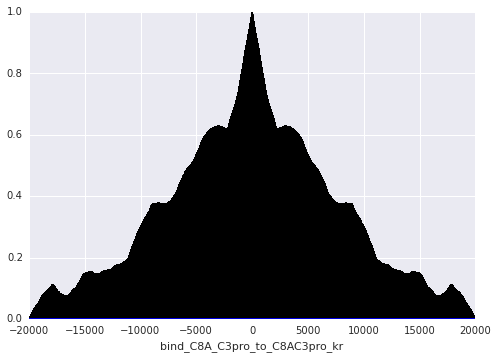

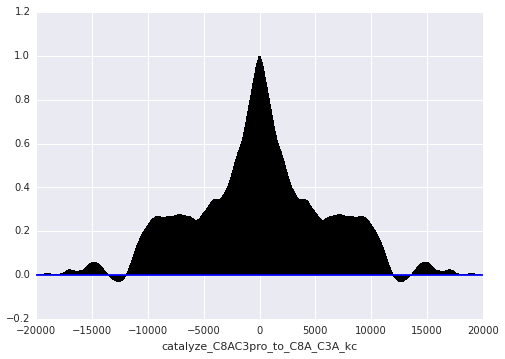

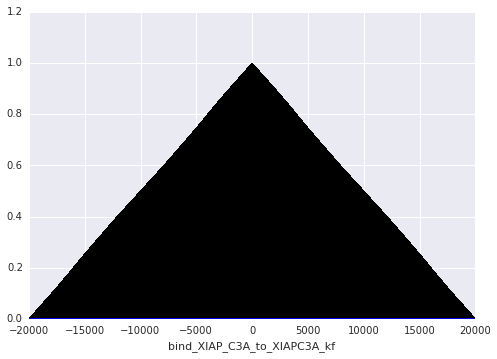

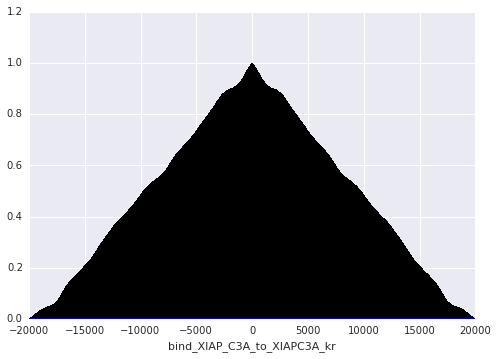

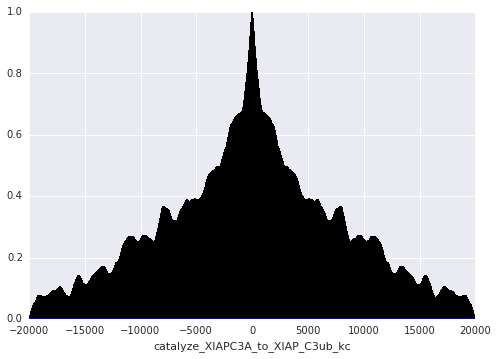

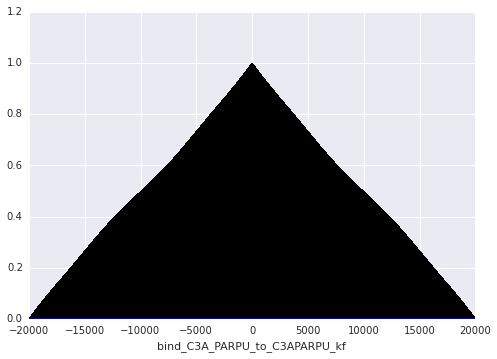

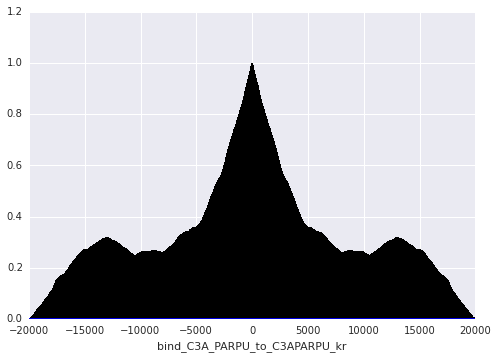

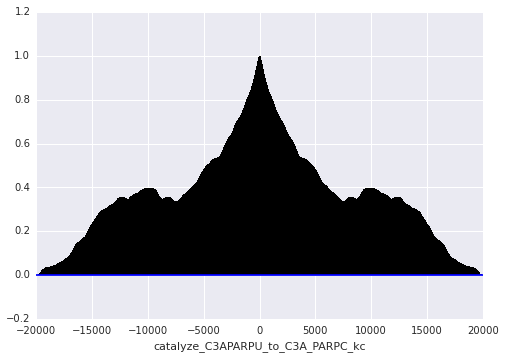

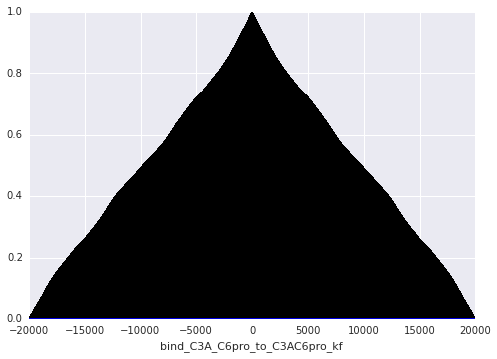

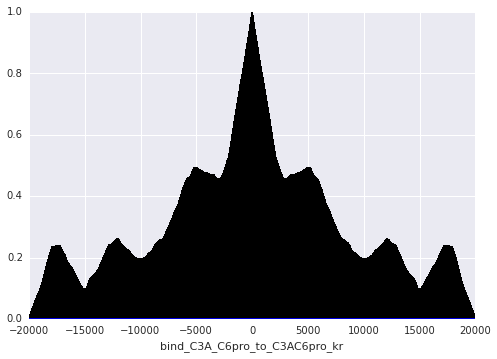

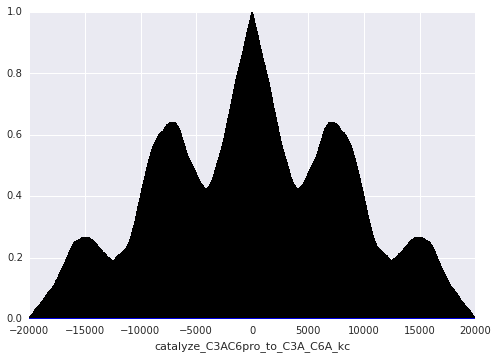

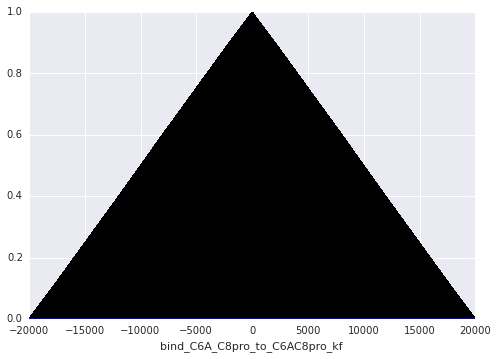

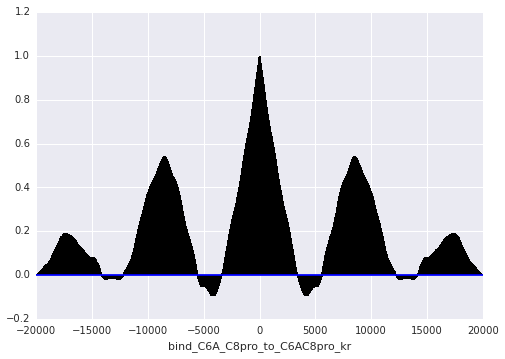

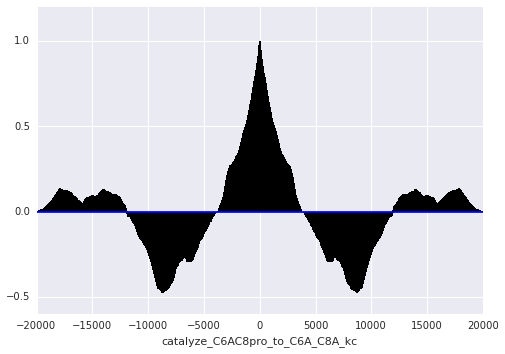

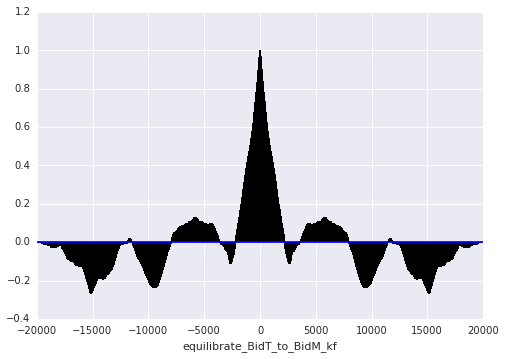

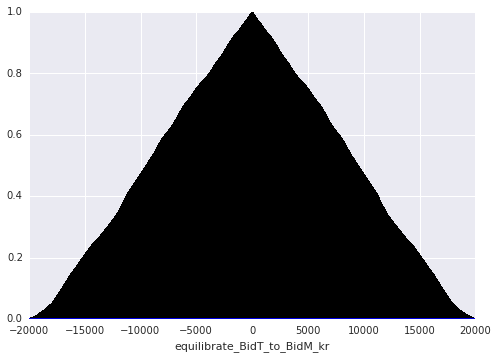

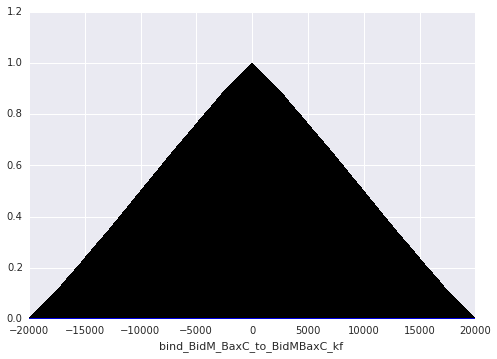

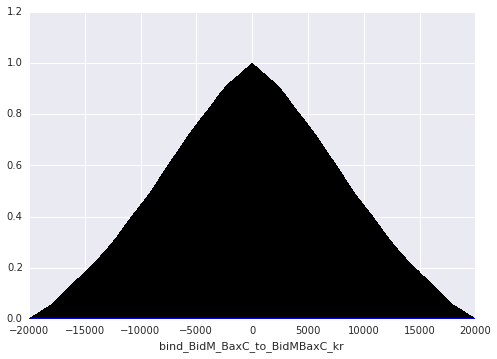

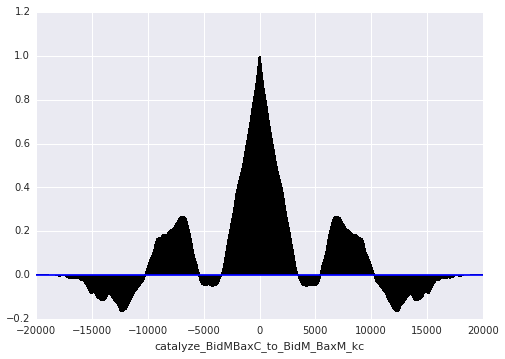

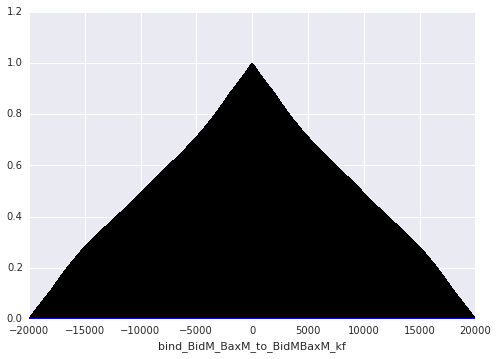

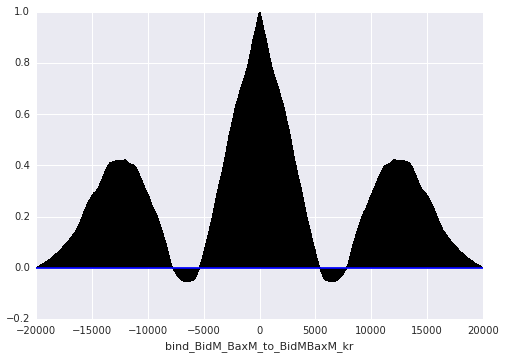

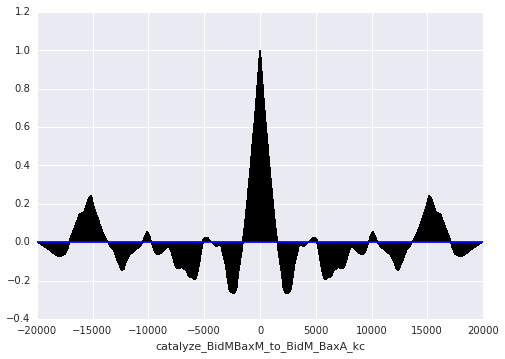

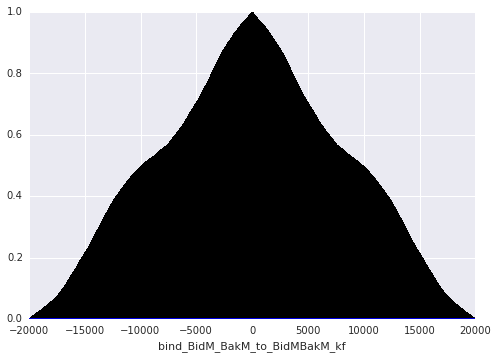

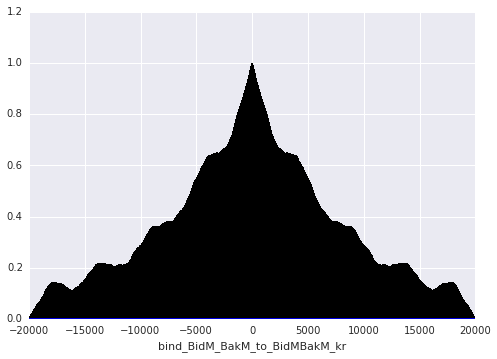

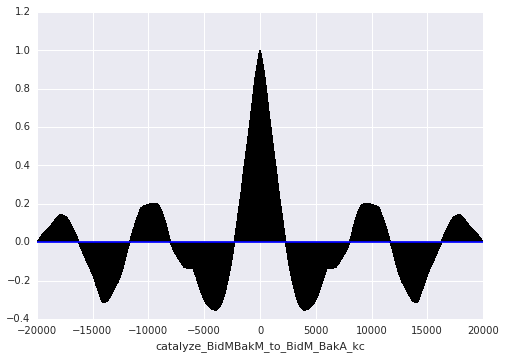

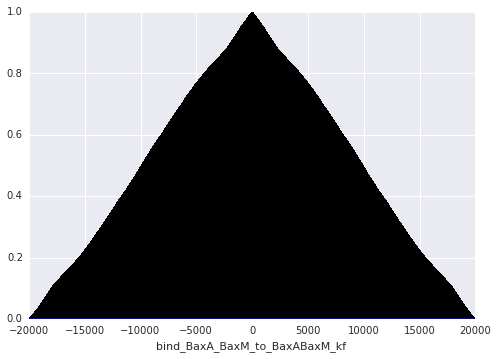

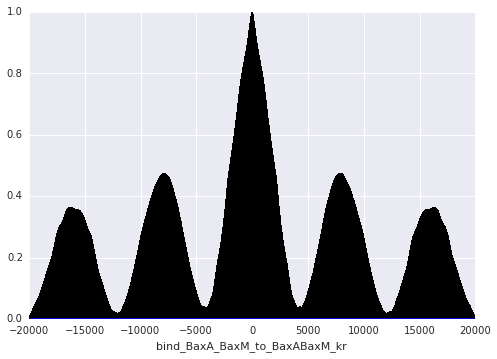

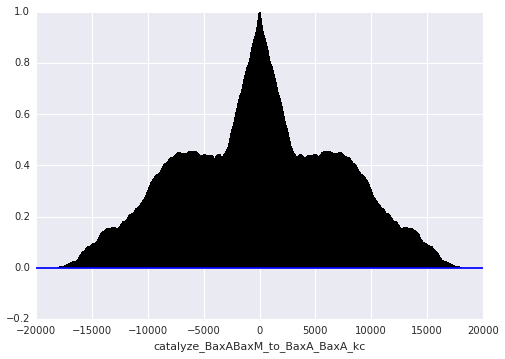

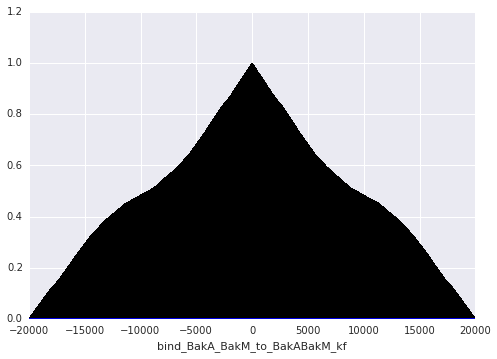

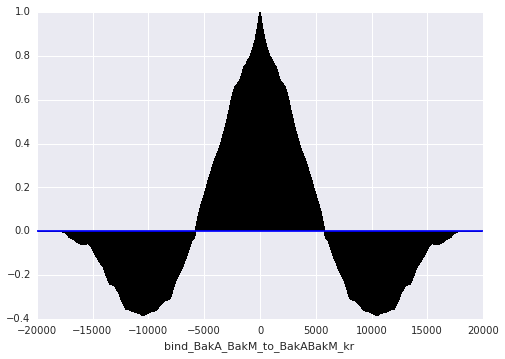

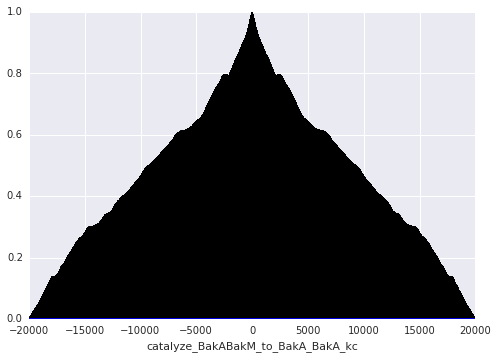

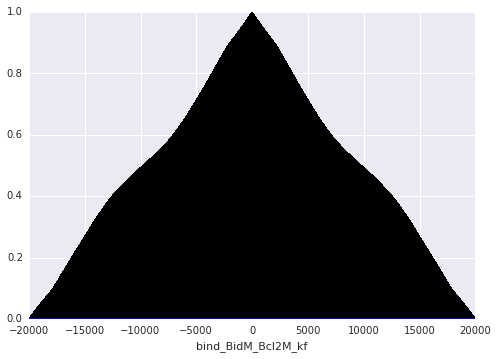

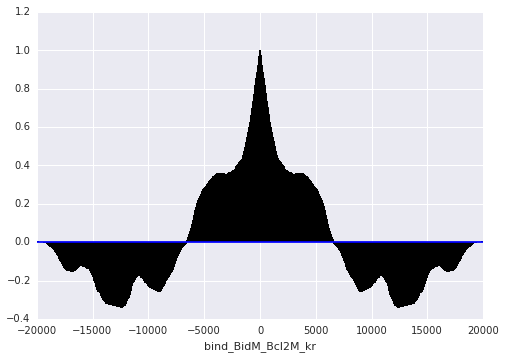

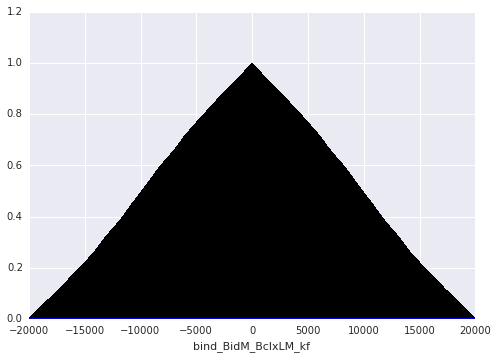

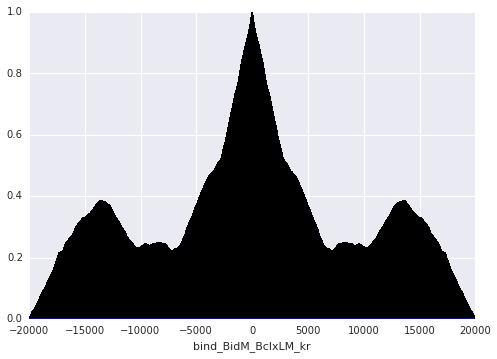

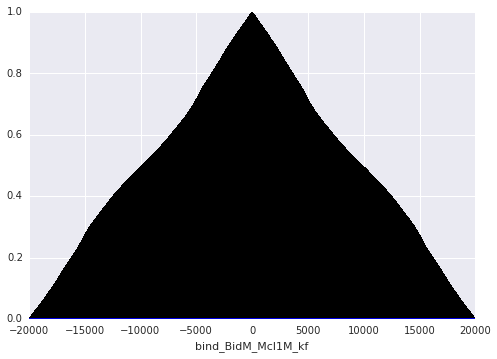

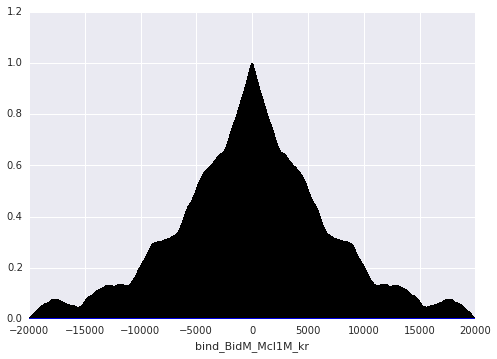

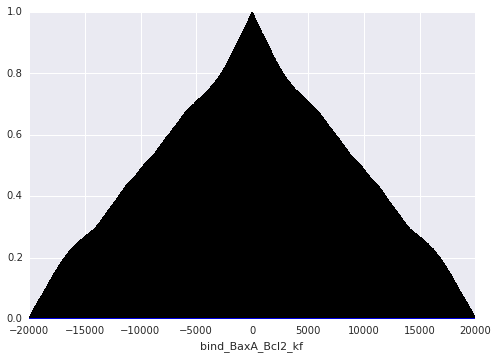

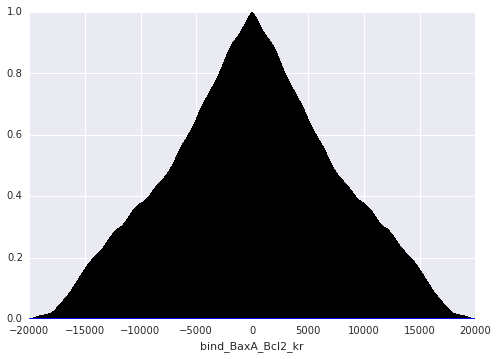

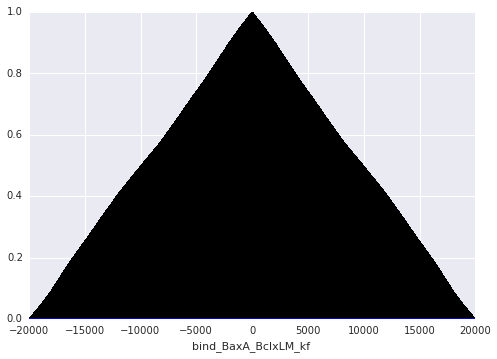

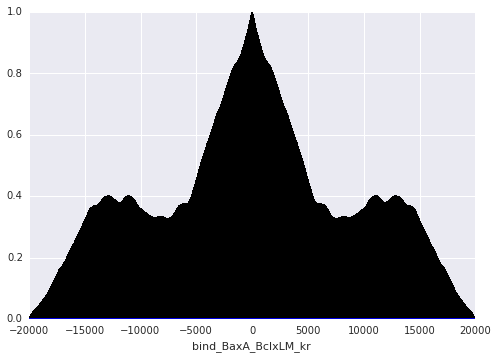

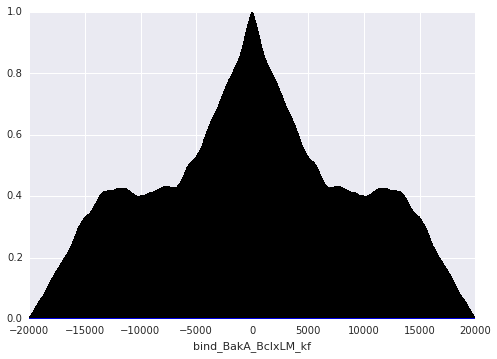

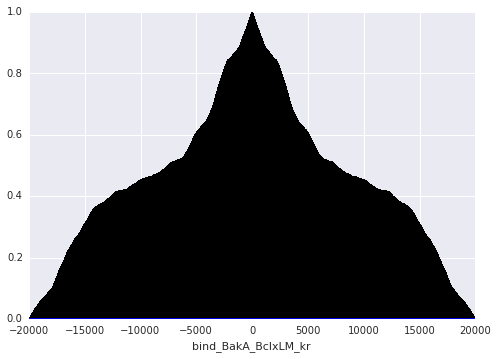

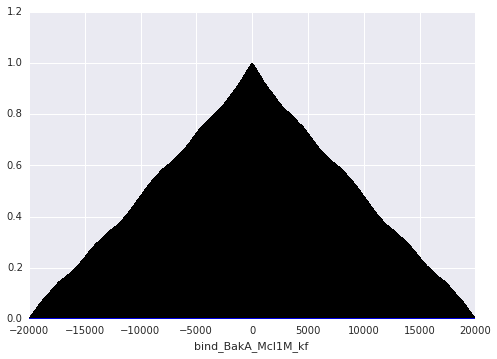

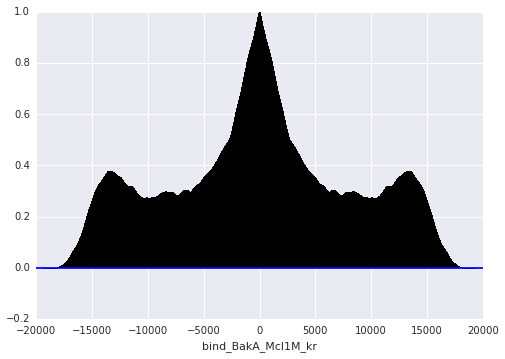

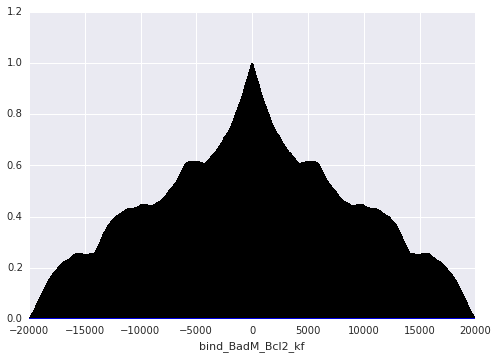

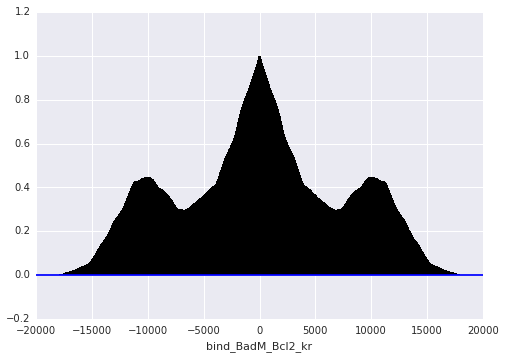

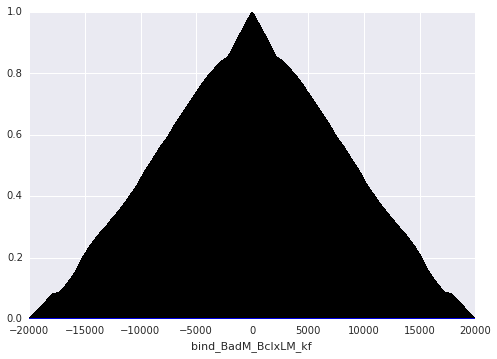

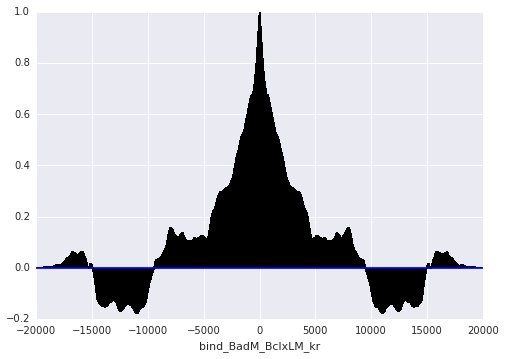

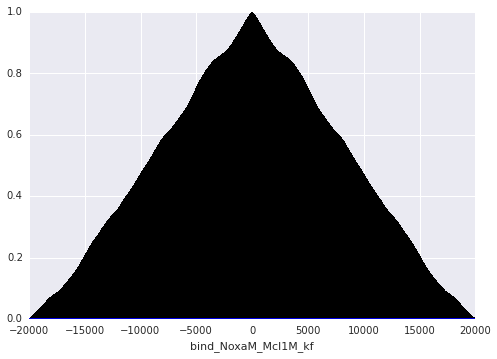

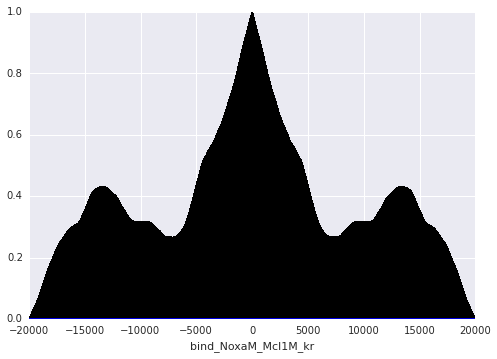

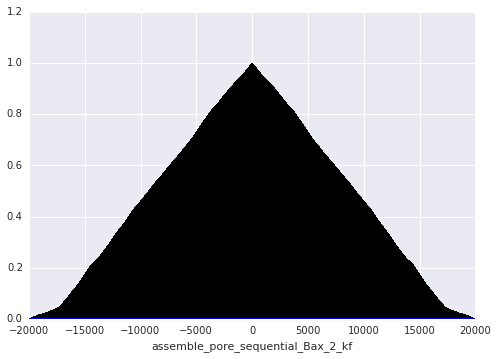

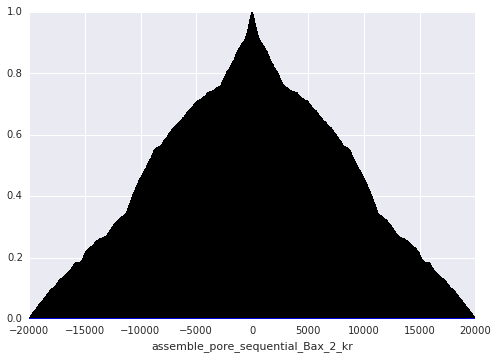

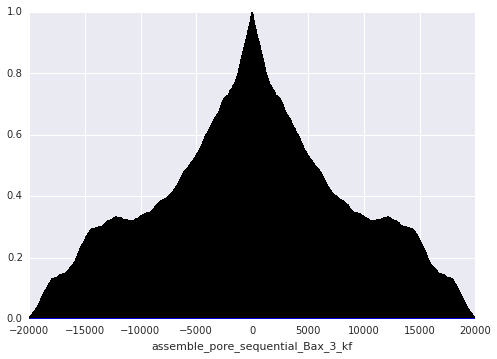

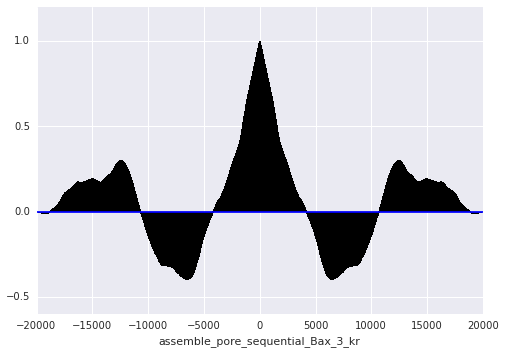

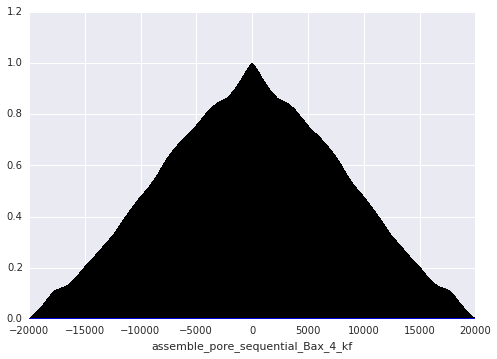

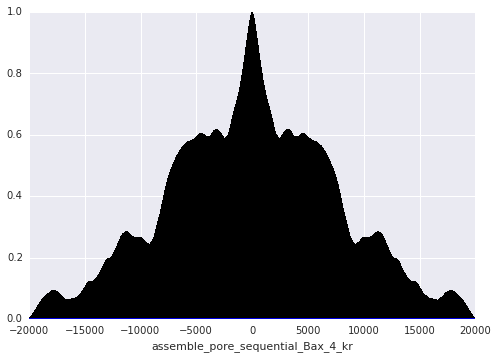

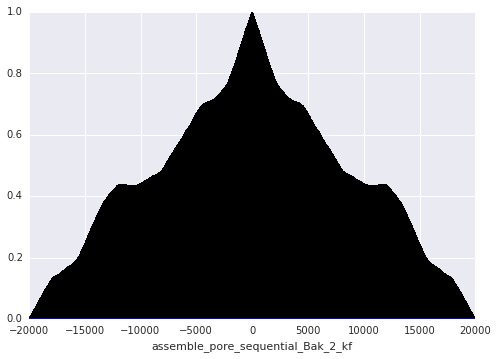

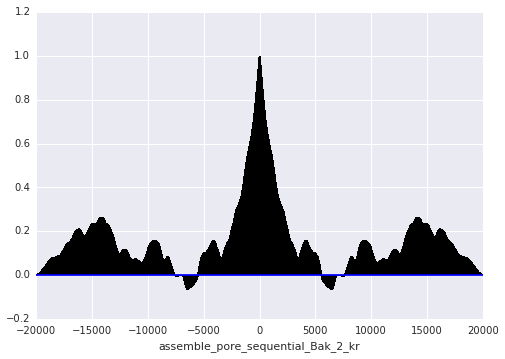

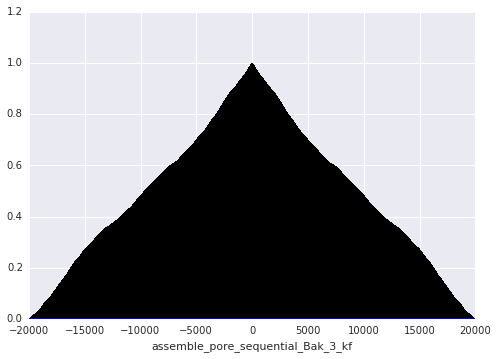

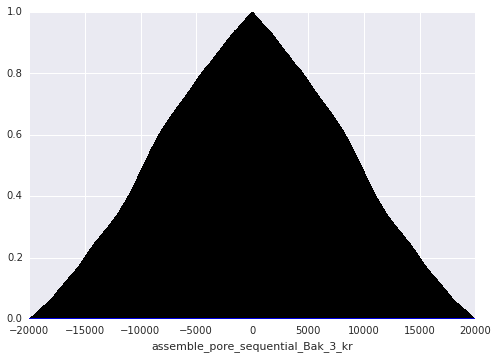

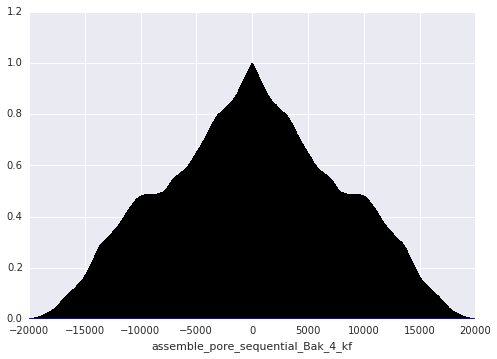

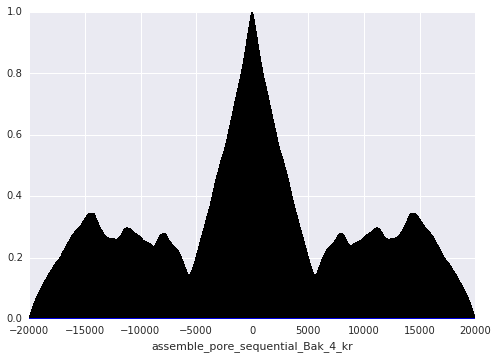

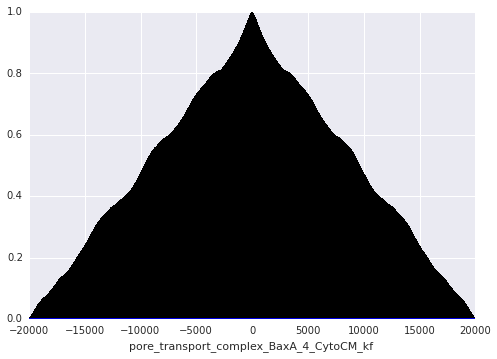

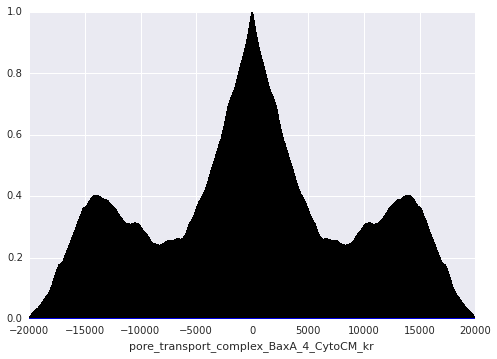

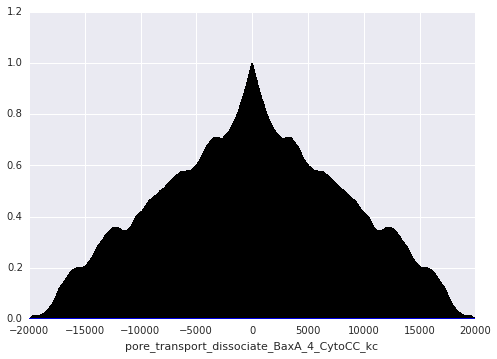

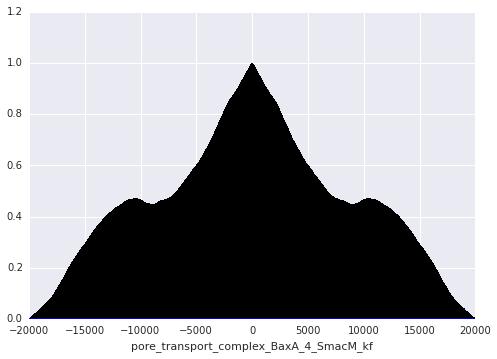

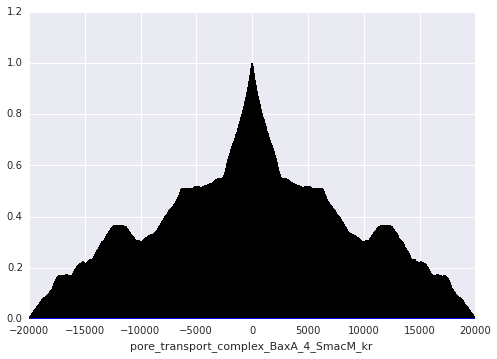

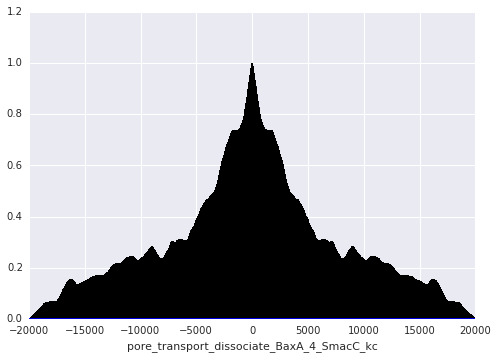

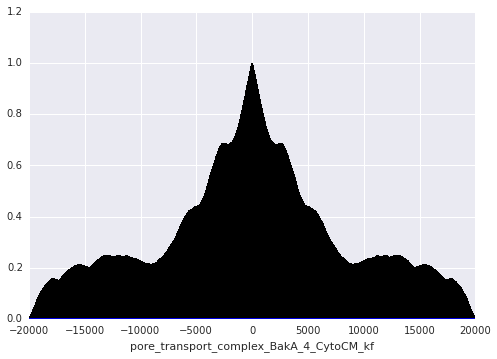

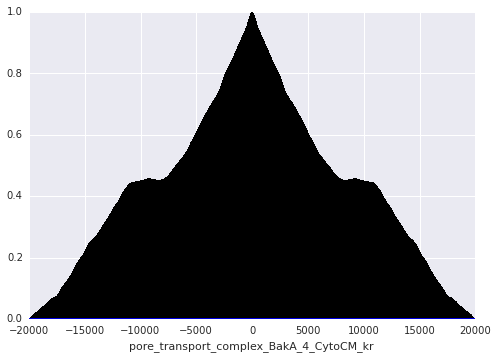

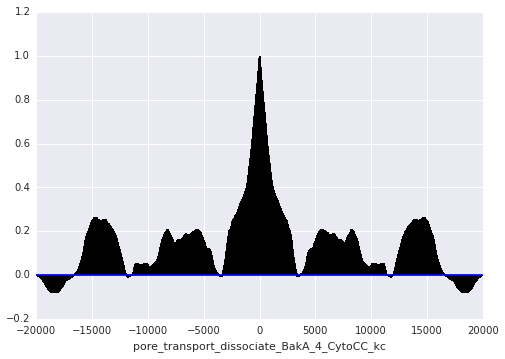

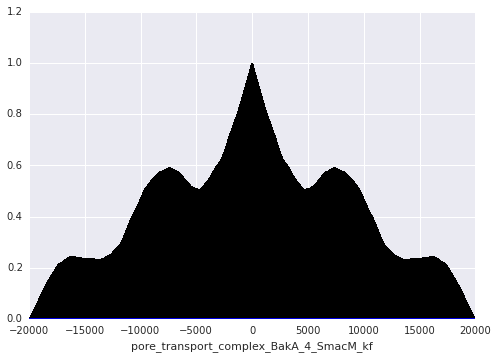

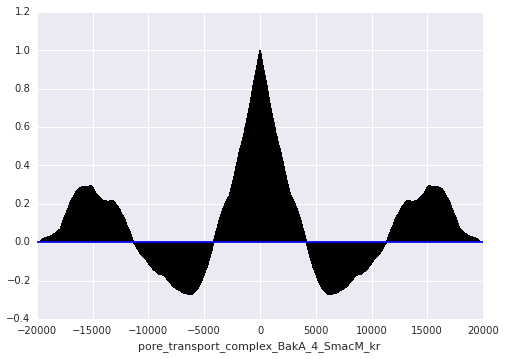

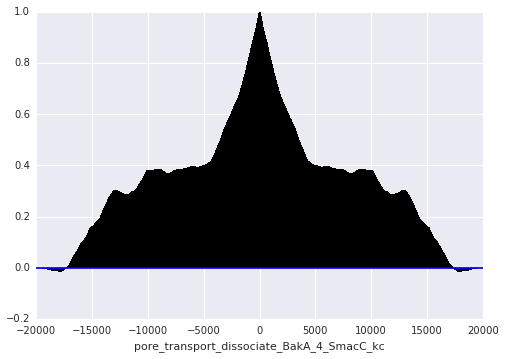

In [17]:
for dim, param_name in enumerate([param.name for param in model.parameters_rules()]):
    fig = plt.figure()
    plt.acorr(traces['a'][0][30000::,dim], maxlags=None)
    plt.xlabel(str(param_name))

In [ ]:
corner(trace_arr_a[:,50:60:], labels=param_trace_dict_a['param_list'][50:60], bins=10)